## Assignment 1: Machine Learning Methods

### \<Stuti Nainwal> \<a1909322>

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

### 1. Read the dataset

Here we have started by importing all the necessary libraries and then loading the dataset using read_csv and storing it into a variable called 'data'

In [933]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold

# import scikitplot as skl
sns.set()

# Load the dataset
data = pd.read_csv('ObesityDataSet (1).csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### 2. Analyse and visualise the data

**head()** is used to show the first few rows of the dataset.

In [934]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The code below is used to determine the shape of the DataSet.

In [935]:
data.shape

(2111, 17)

The **data.columns** attribute returns a pandas Index object containing the column labels of the DataFrame data. Each label corresponds to the name of a column in the Dataset. This attribute is useful for accessing, iterating over, or manipulating column names programmatically.

In [936]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

The **data.info()** method provides a concise summary of the DataFrame data, including information about the index, column data types, non-null values, and memory usage.

In [937]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

To display the data types of each column in our dataset, we have used the **.dtypes** attribute.

In [938]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

The code below checks for missing values in the DataFrame data and prints the sum of missing values for each column.

In [939]:
# Check for missing values
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


This code generates summary statistics for the numerical columns in the DataFrame data using the **describe()** method.

In [940]:
# Summary statistics for numerical columns
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

The code below shows categorical and numerical columns in our dataset separately.

In [941]:
# Get the data types of each column
data_types = data.dtypes

# Separate categorical and numerical columns
categorical_columns = data_types[data_types == 'object'].index.tolist()
numerical_columns = data_types[data_types != 'object'].index.tolist()

# Print categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

Numerical Columns:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


This code generates a count plot using seaborn (sns) library to visualize the distribution of different obesity levels in the dataset. It specifies the variable 'NObeyesdad' on the x-axis and utilizes the data from the DataFrame data. The count plot displays the frequency of each unique value in the 'NObeyesdad' column, which presumably represents different levels of obesity. It shows that we have the highest count of Obesity_Type_I then Obesity_Type_III and then Obesity_Type_II. The target variable (the different levels of obesity) is balanced, meaning that each class has roughly the same number of samples, then there's no need to balance the dataset by oversampling, undersampling, or using other techniques to address class imbalance.

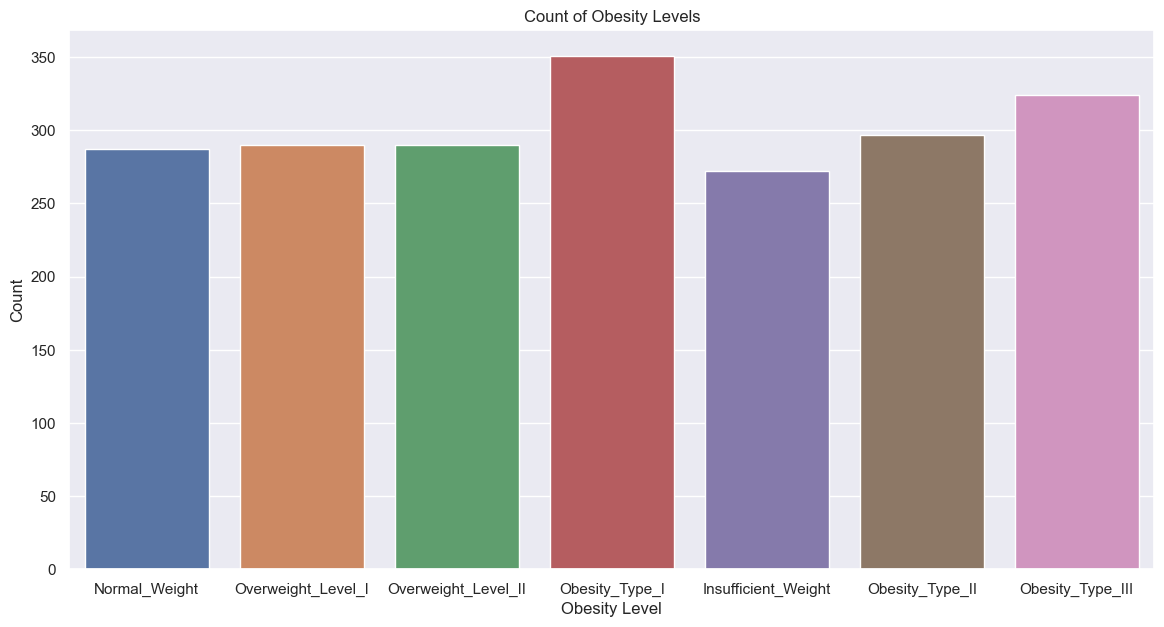

In [942]:
plt.figure(figsize=(14, 7))
sns.countplot(x='NObeyesdad', data=data)
plt.title('Count of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()


This code generates bar plots to visualize the average values of numerical columns across different levels of obesity (NObeyesdad) The code iterates through a list of numerical column names such as 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF' and 'TUE'. For each numerical column, a new figure is created with a specified size using plt.figure(figsize=(14, 8)). Then, a bar plot is generated using Seaborn's barplot function. The x-axis represents the levels of obesity ('NObeyesdad'), and the y-axis represents the average value of the corresponding numerical column..

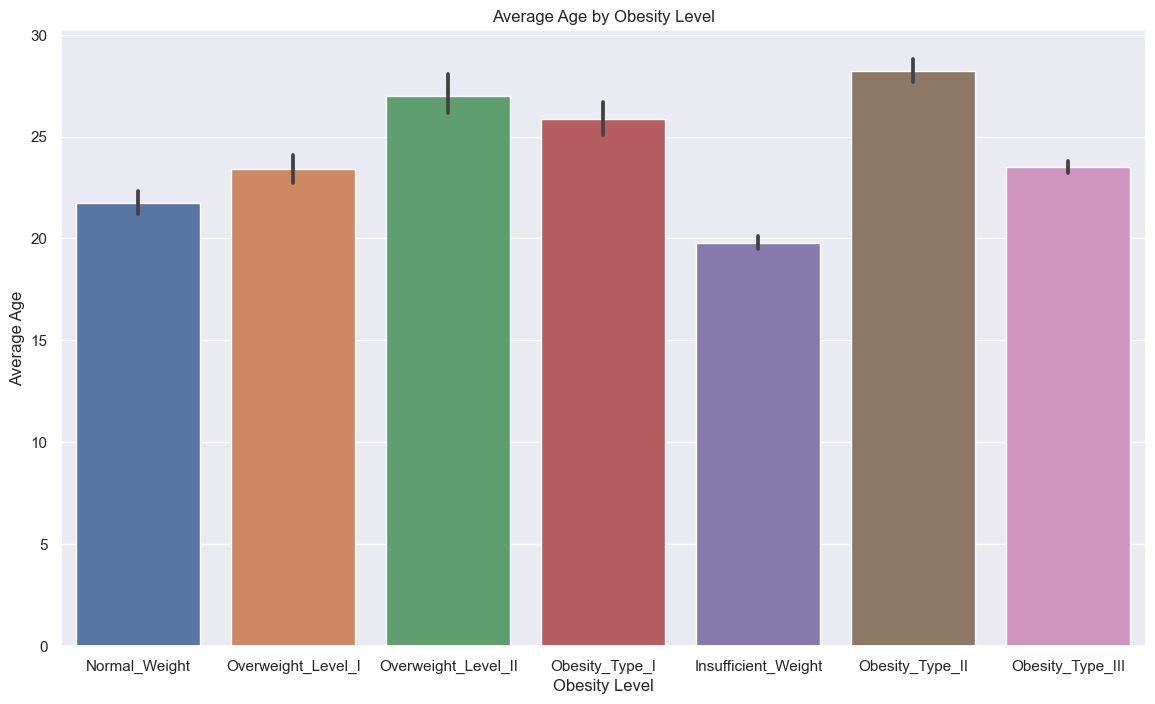

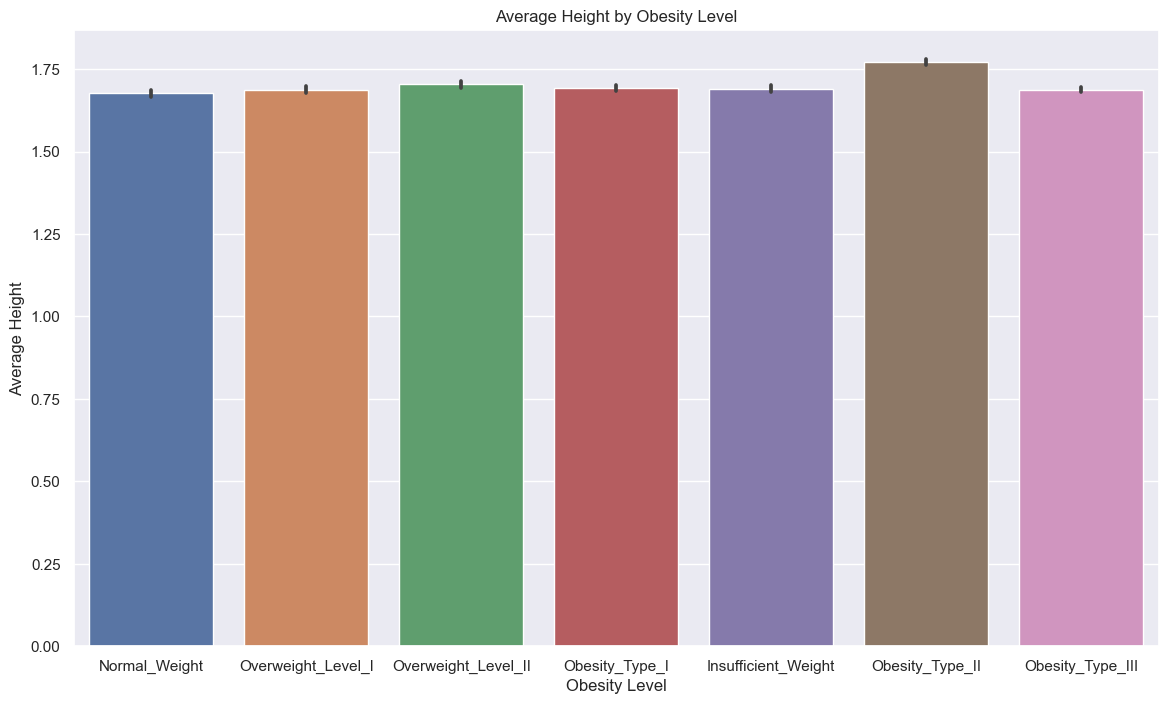

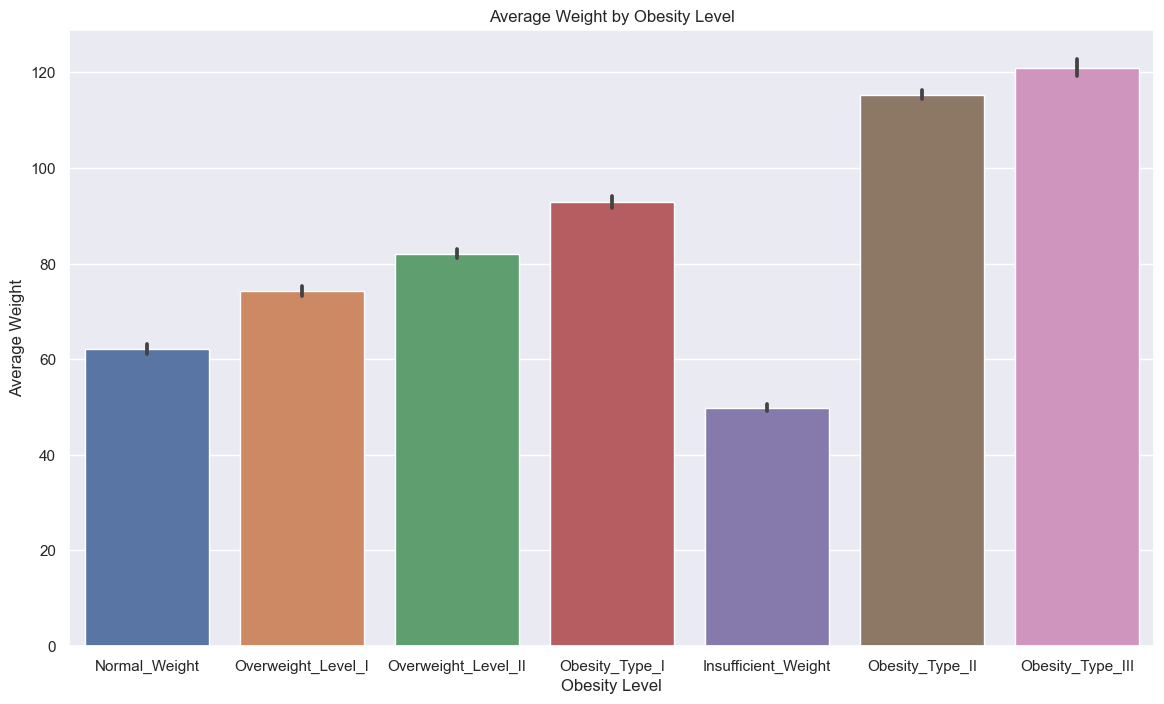

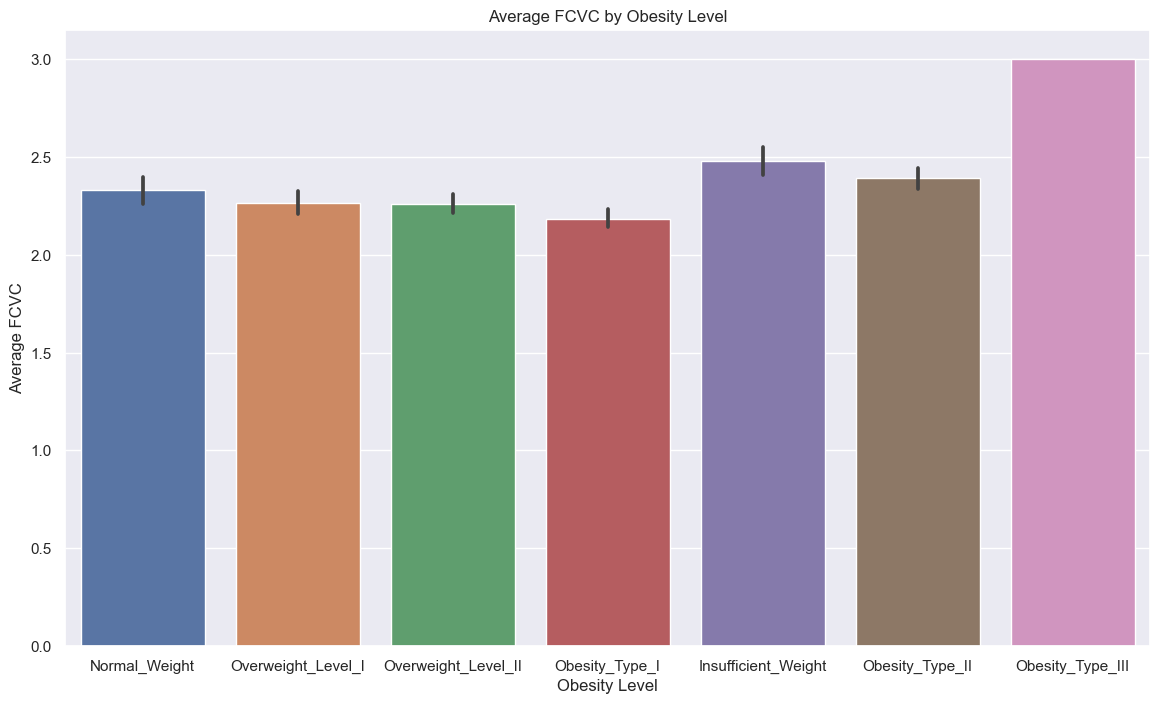

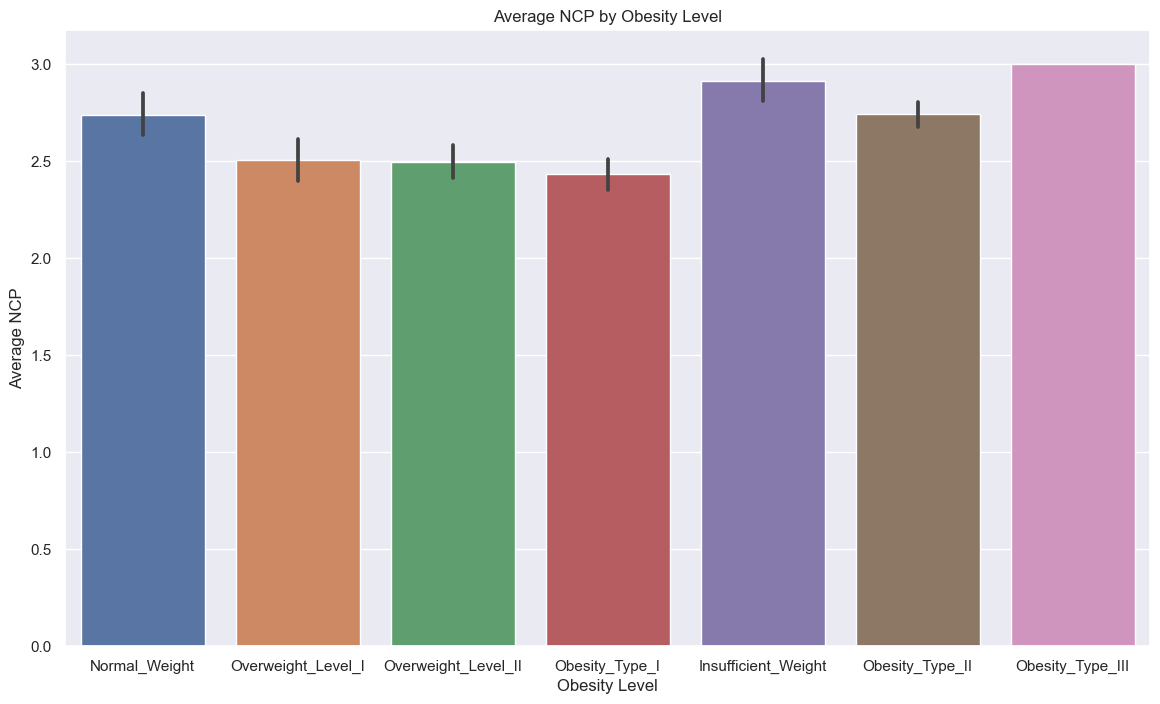

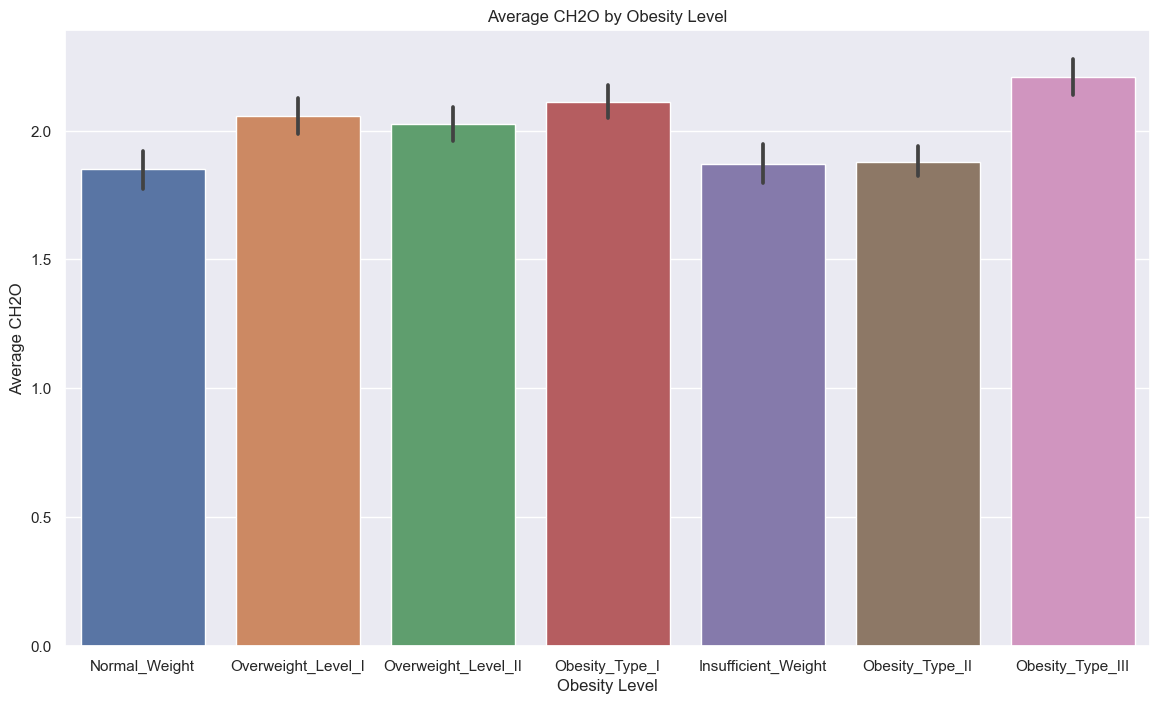

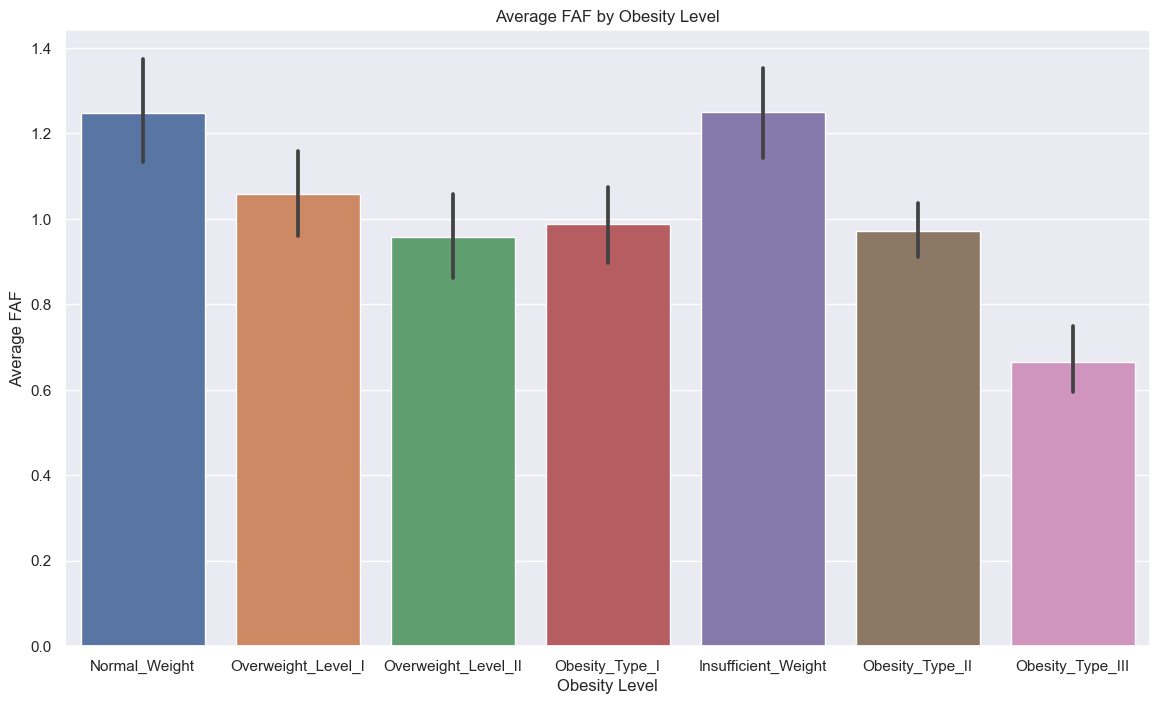

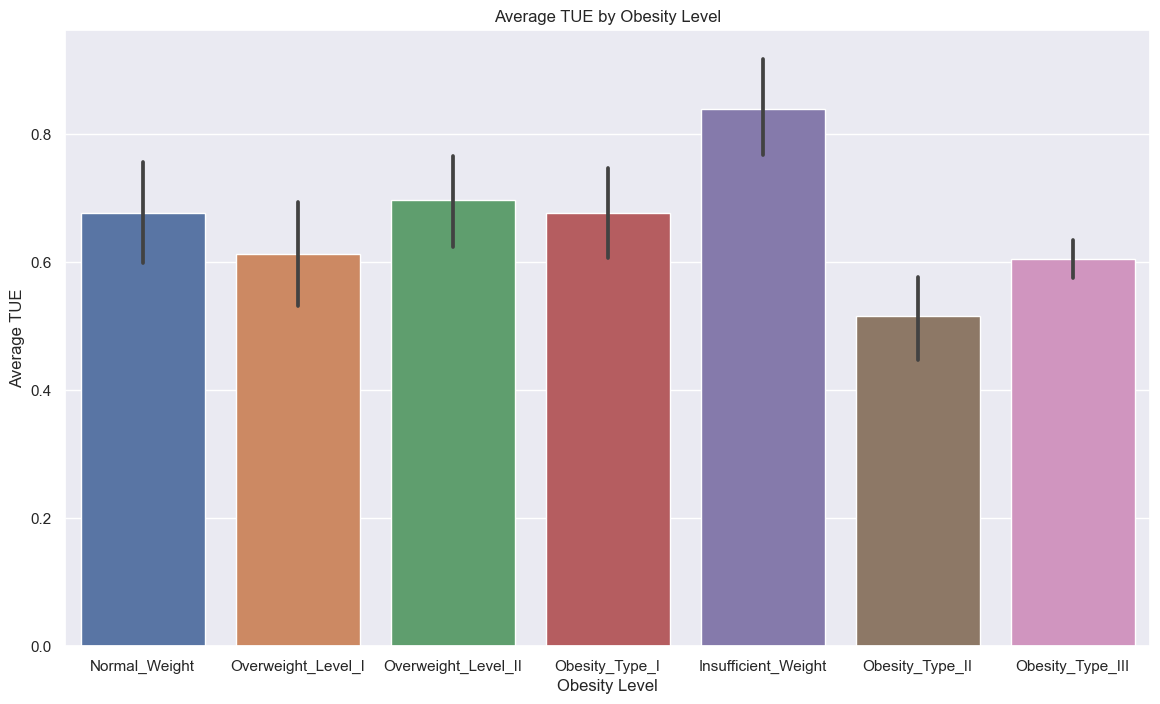

In [943]:
# Visualize numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in numerical_columns:
    plt.figure(figsize=(14, 8))
    sns.barplot(x='NObeyesdad', y=column, data=data)
    plt.title('Average '+column+ ' by Obesity Level')
    plt.xlabel('Obesity Level')
    plt.ylabel('Average '+column)
    plt.show()

This code generates box plots to visualize the distribution of numerical columns across different levels of obesity (NObeyesdad). For each numerical column, a new figure is created with a specified size using plt.figure(figsize=(14, 8)). Then, a box plot is generated using Seaborn's boxplot function. The x-axis represents the levels of obesity ('NObeyesdad'), and the y-axis represents the values of the corresponding numerical column. : Each plot is given a title indicating the distribution of the numerical column by obesity level. The x-axis is labeled as 'Obesity Level', and the y-axis is labeled with the name of the numerical column.

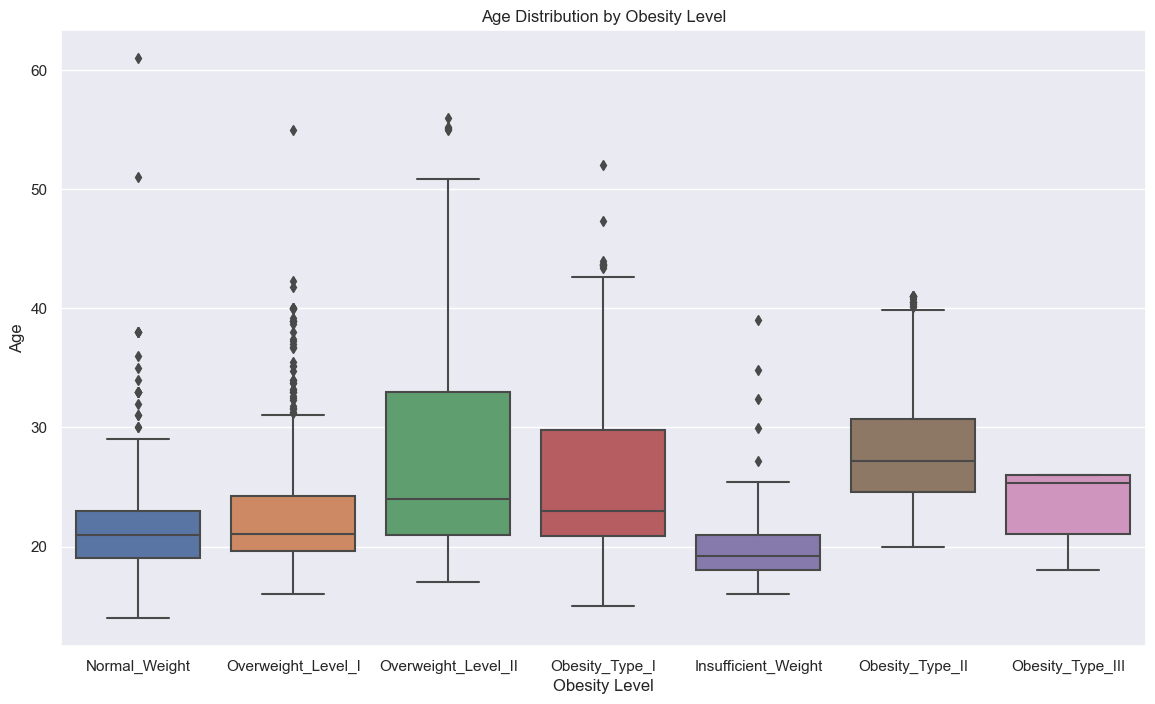

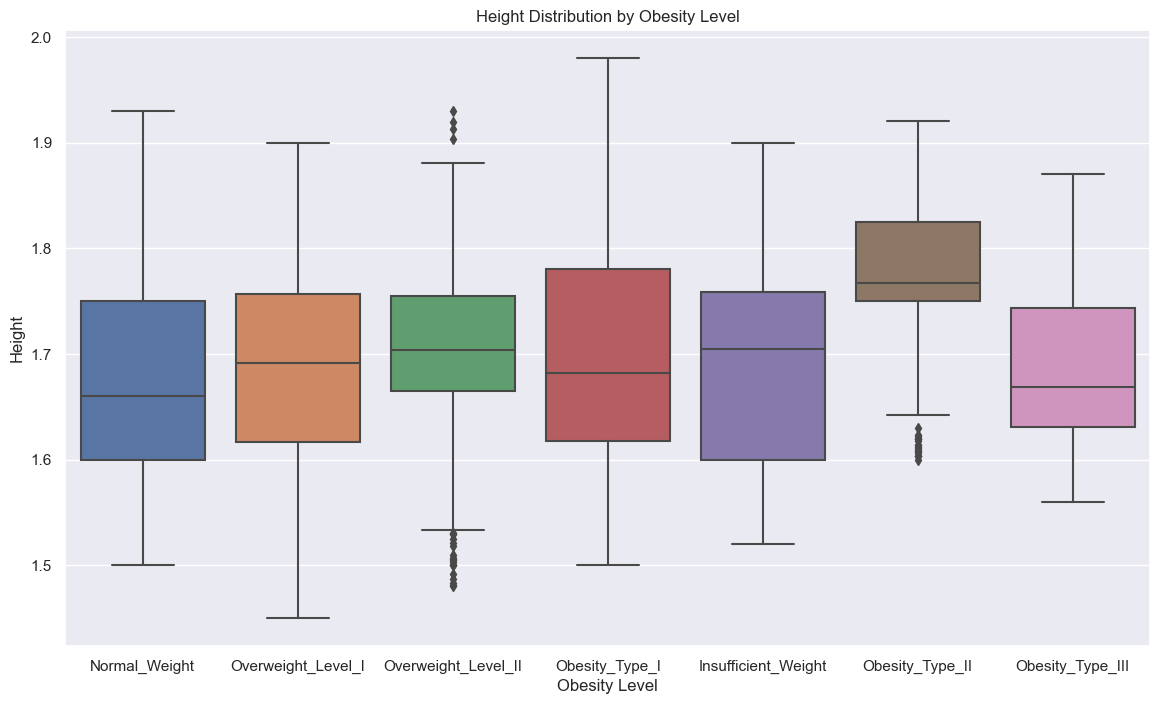

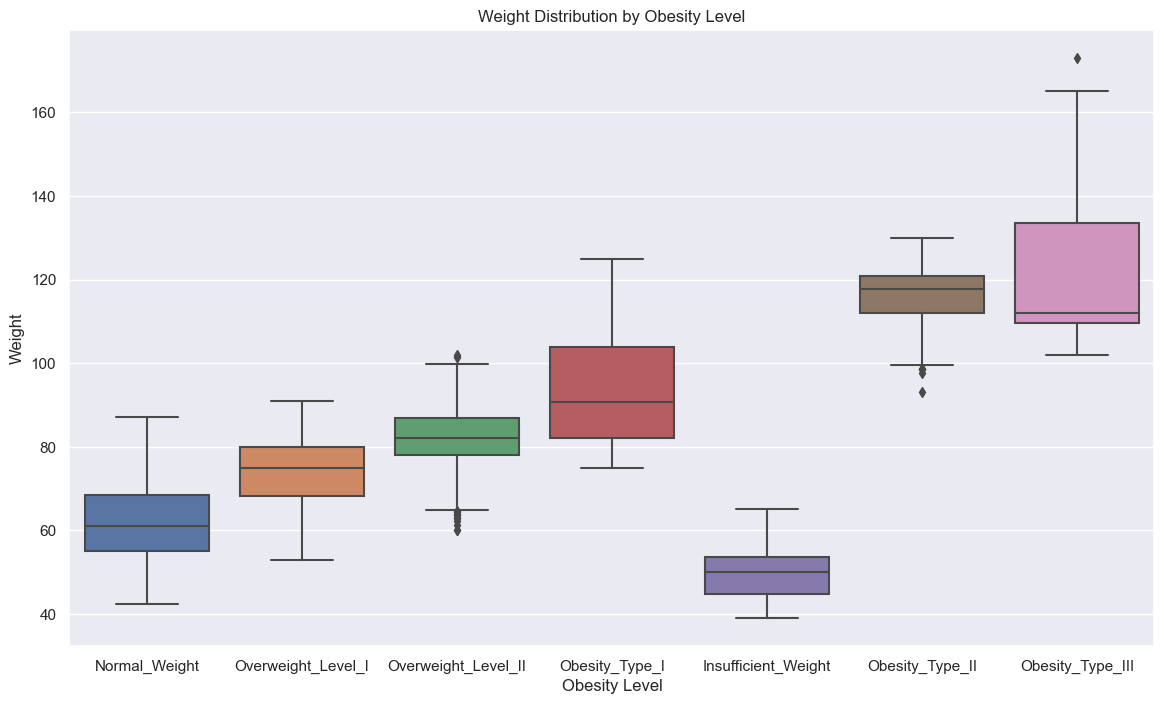

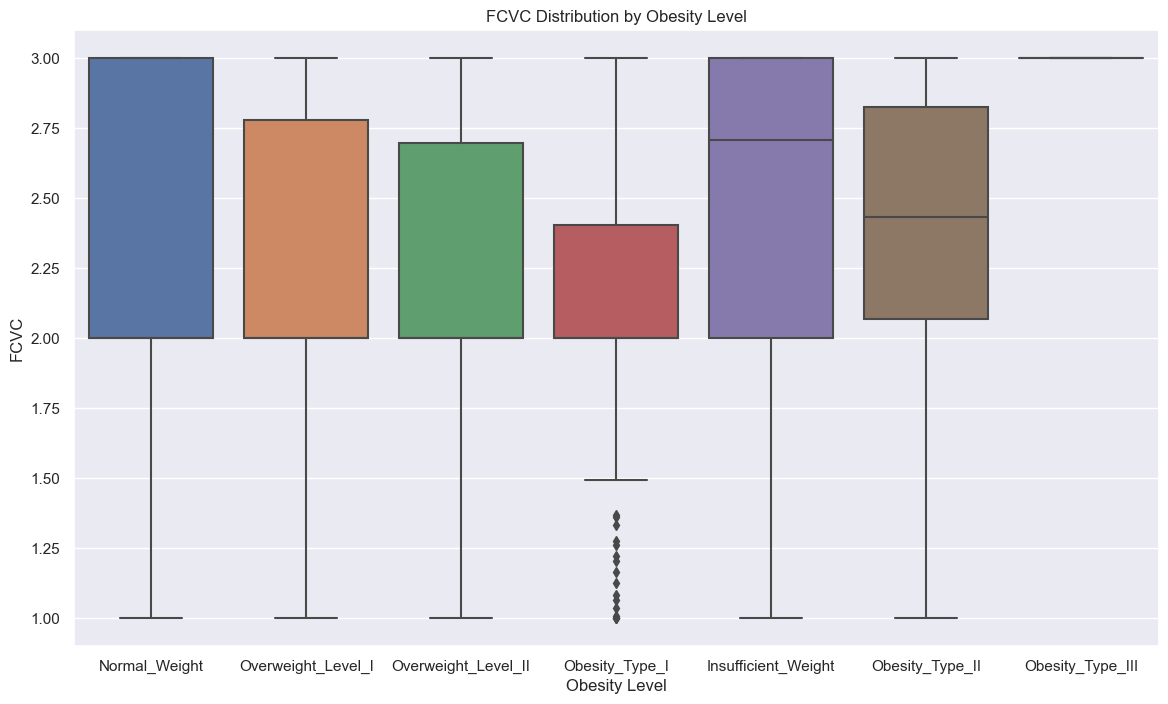

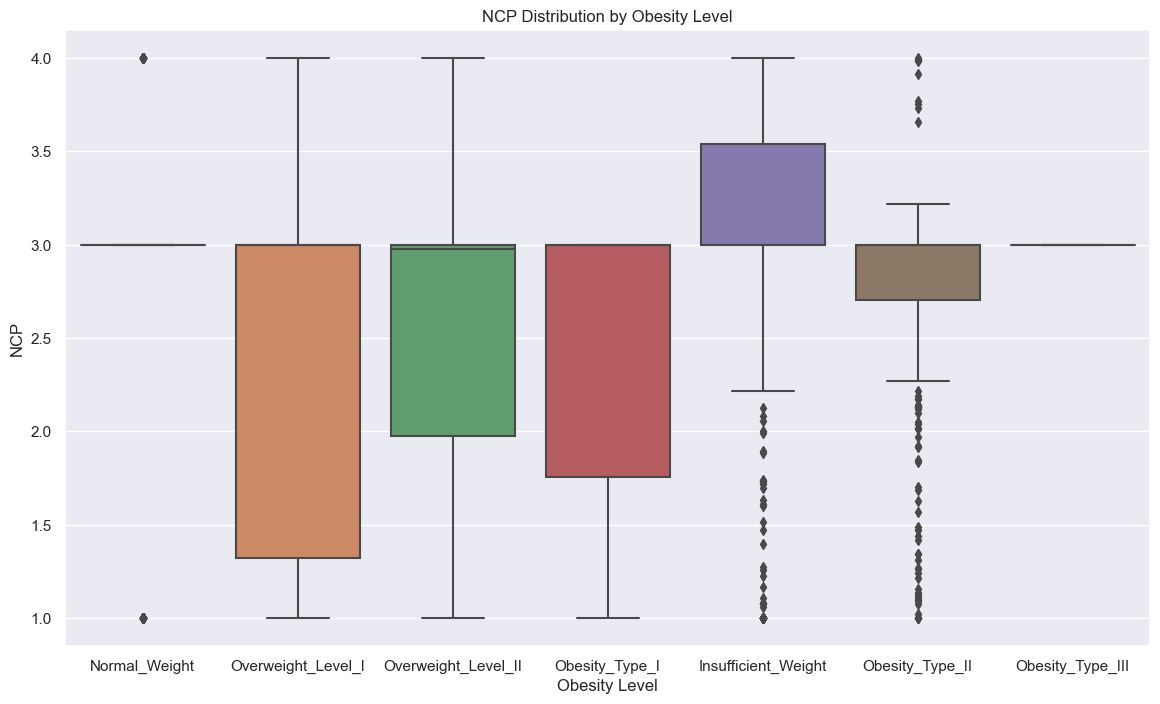

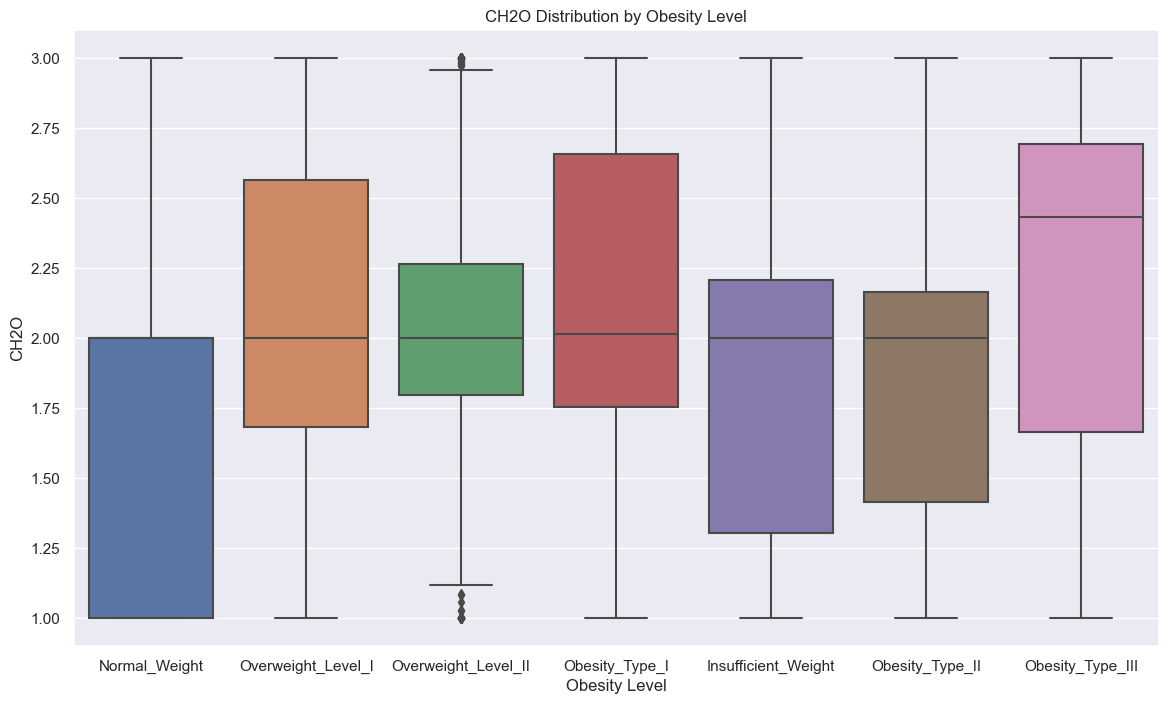

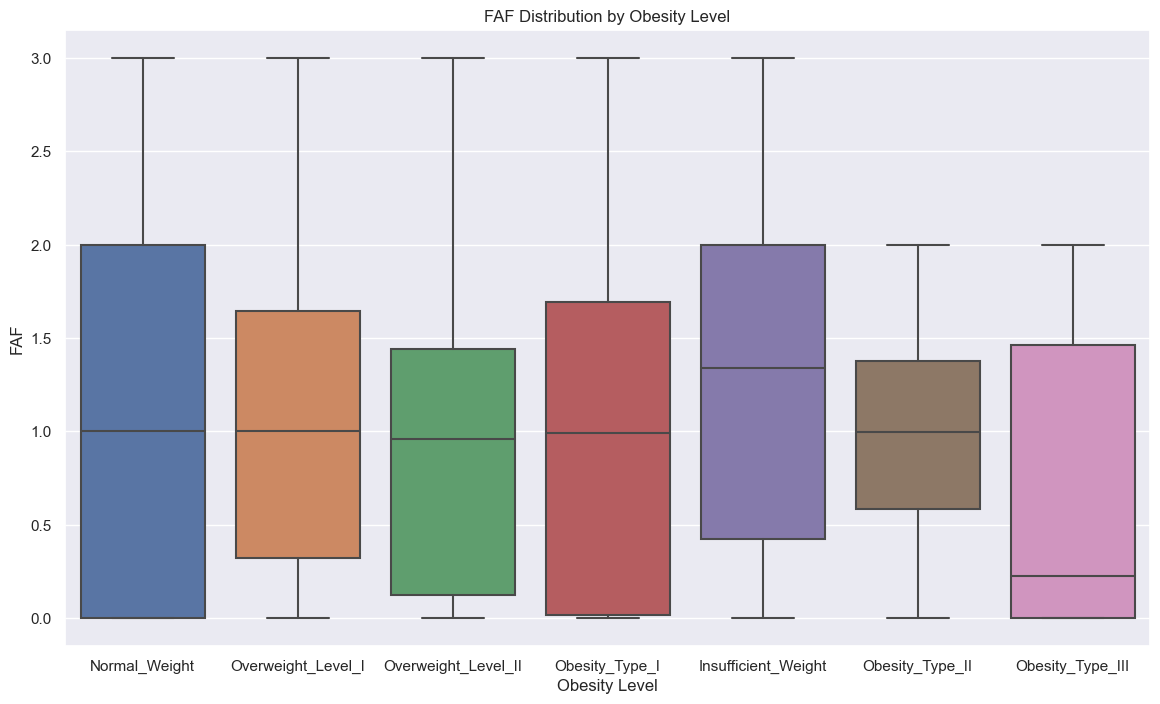

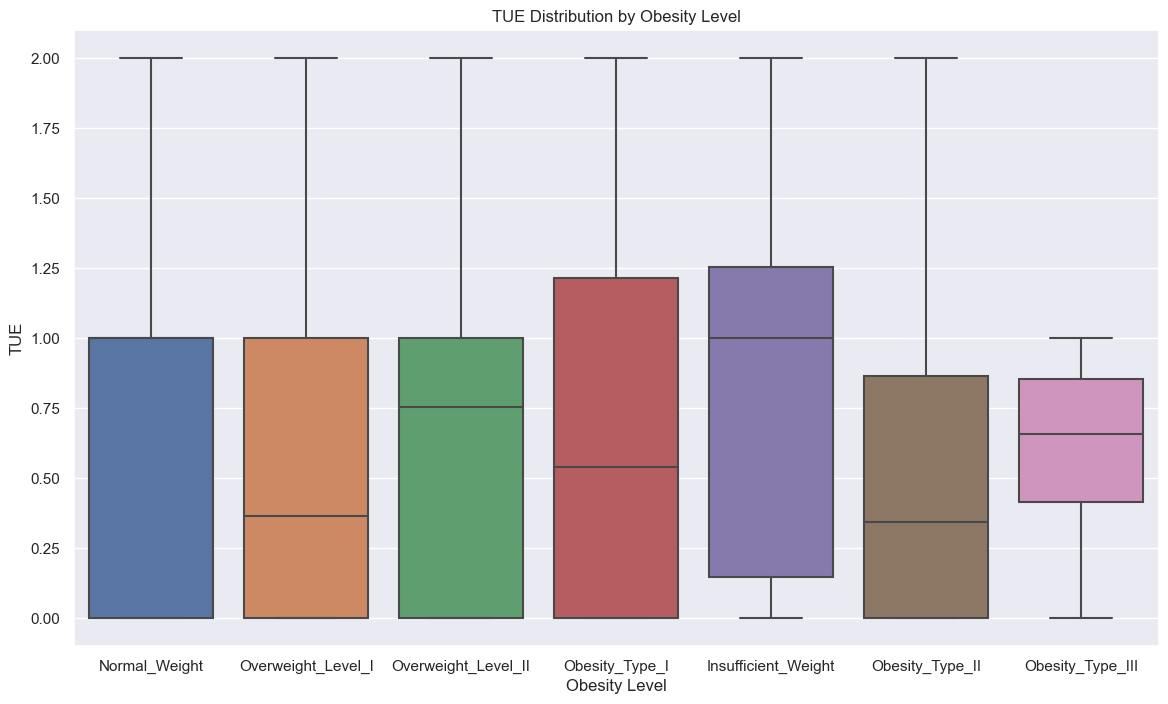

In [944]:
# Visualize numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in numerical_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='NObeyesdad', y=column, data=data)
    plt.title(column+' Distribution by Obesity Level')
    plt.xlabel('Obesity Level')
    plt.ylabel(column)
    plt.show()

This code generates violin plots to visualize the distribution of numerical columns across different levels of obesity (NObeyesdad). For each numerical column, a new figure is created with a specified size using plt.figure(figsize=(14, 6)). Then, a violin plot is generated using Seaborn's violinplot function.

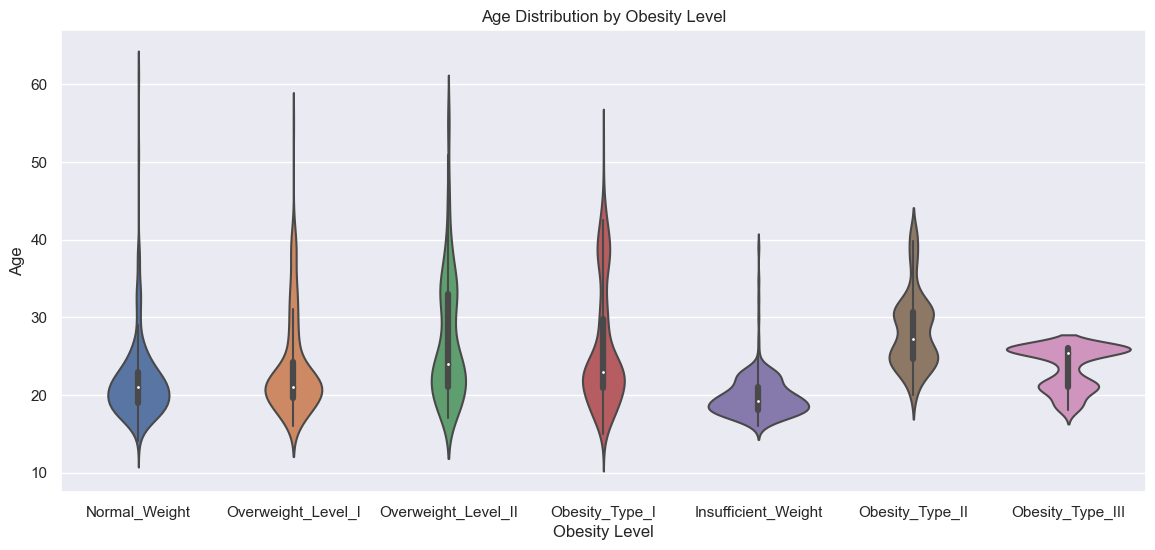

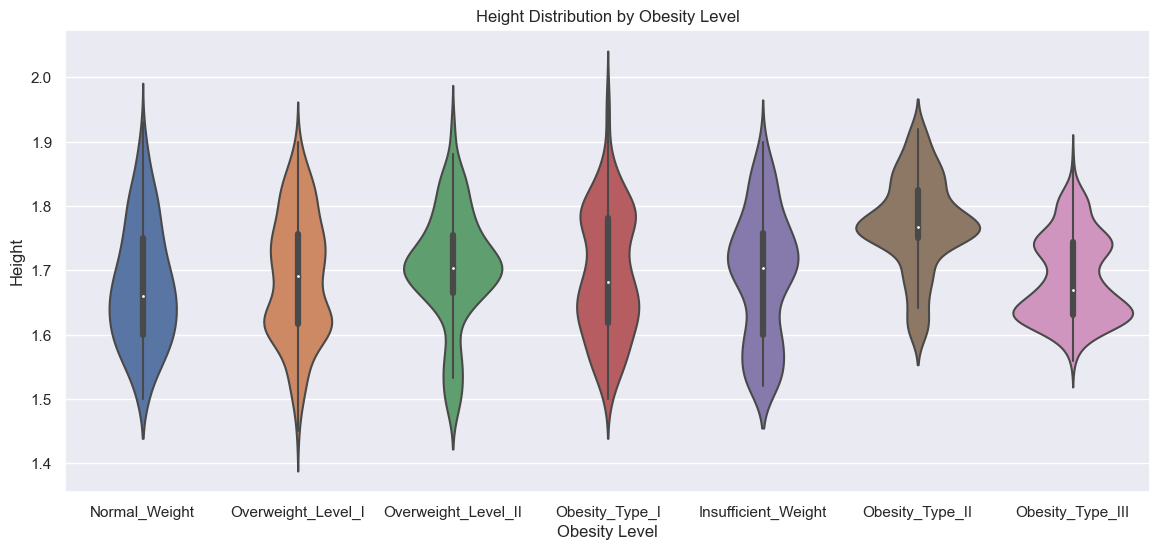

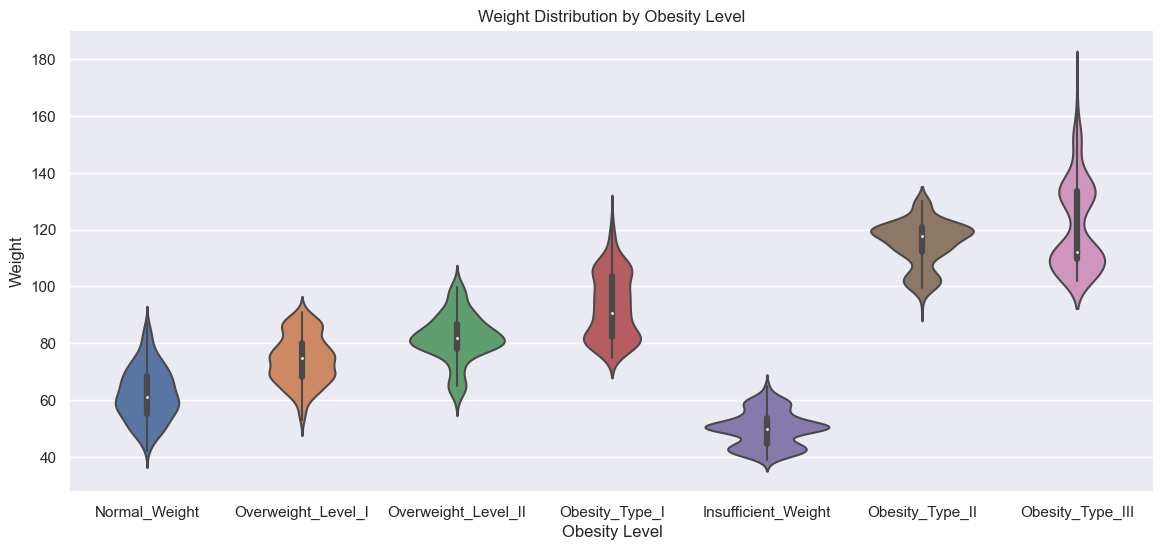

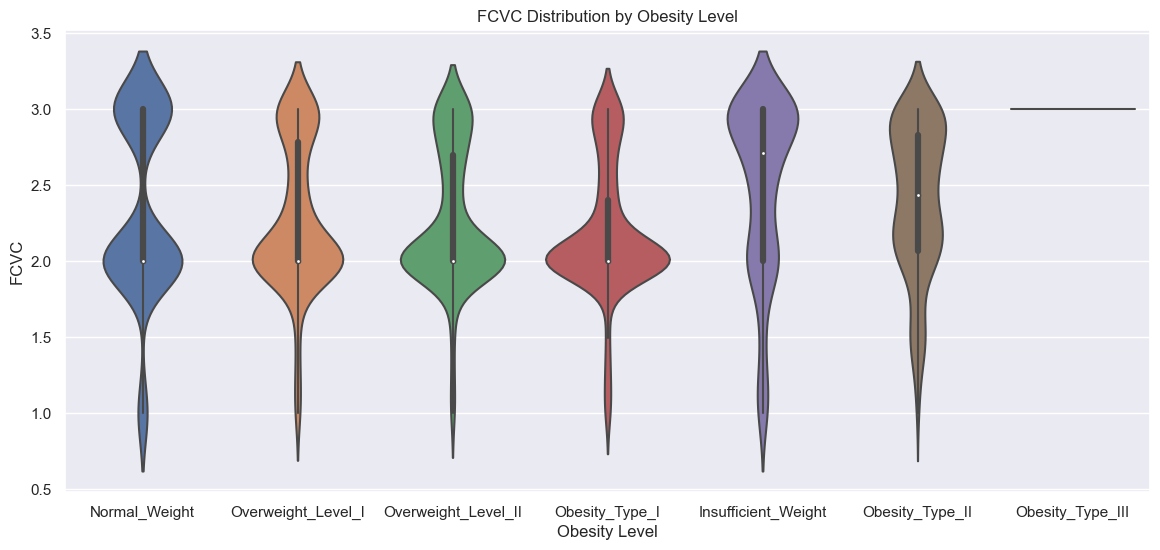

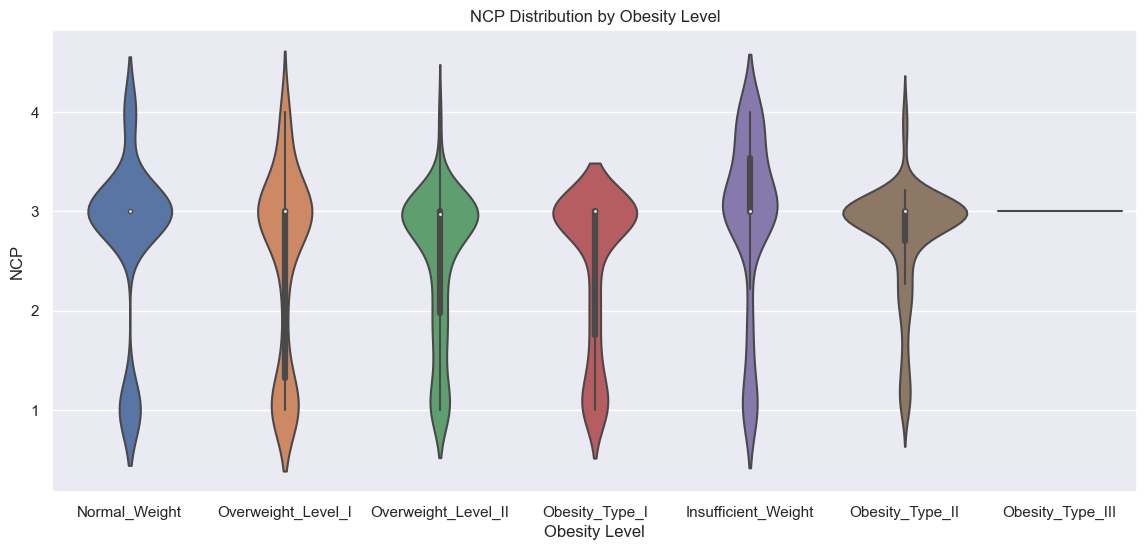

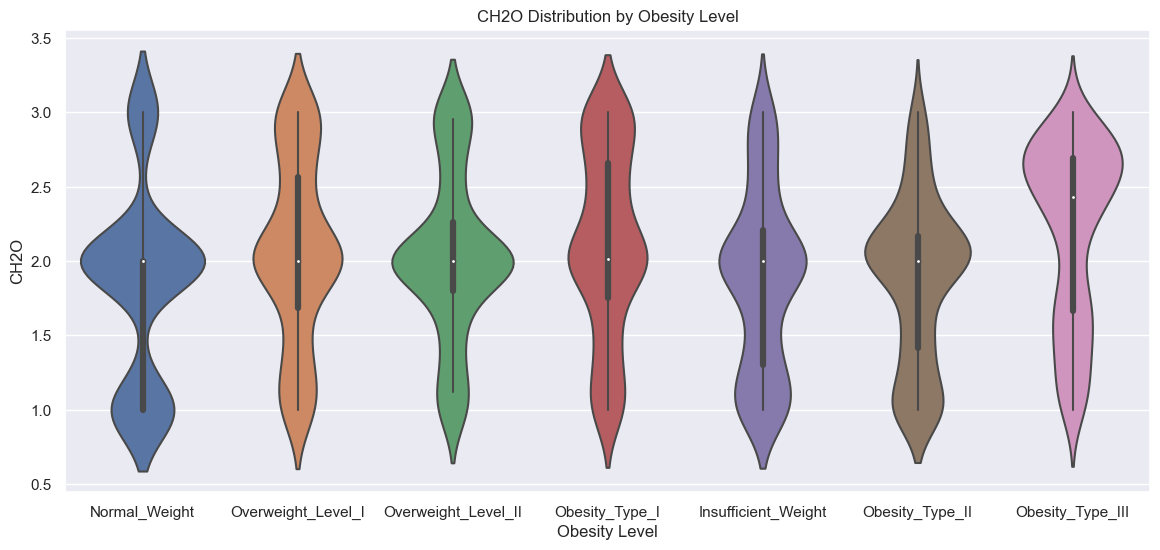

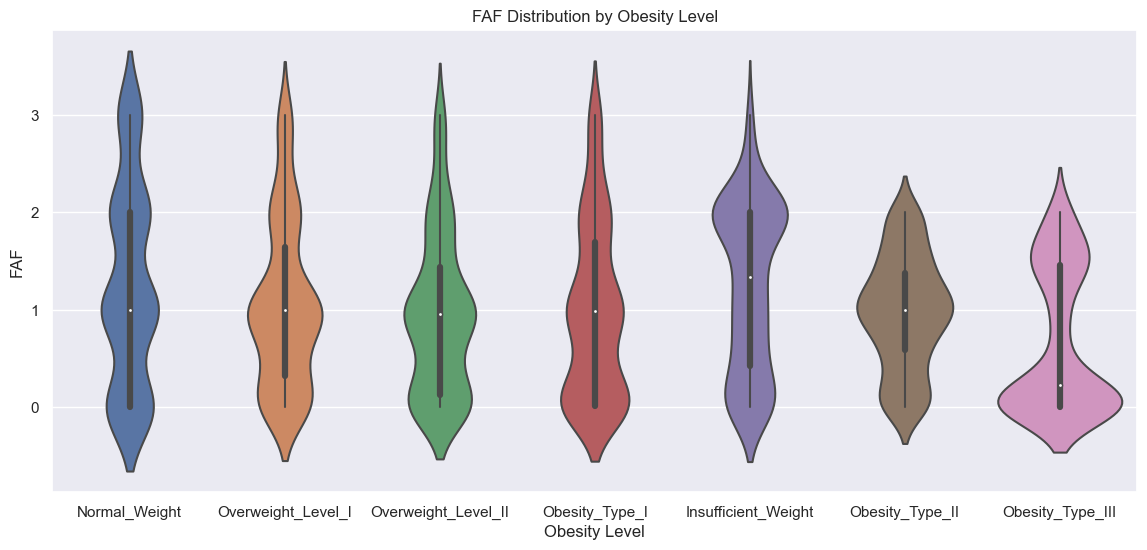

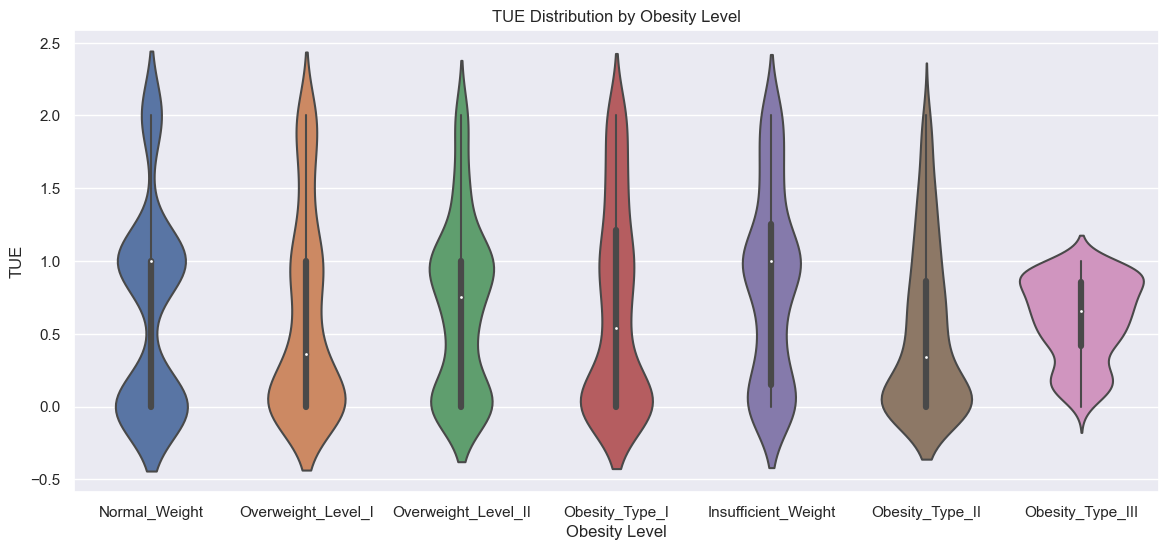

In [945]:
# Visualize numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='NObeyesdad', y=column, data=data)
    plt.title(column+ ' Distribution by Obesity Level')
    plt.xlabel('Obesity Level')
    plt.ylabel(column)
    plt.show()

As from the boxplot and violin plot, we can see there are some outliers in these features - Age, Height, Weight, FCVC, NCP, CH2O.

The below code creates a jointplot, which is a type of plot that combines scatter plots for two variables along with marginal histograms or density plots for each variable. So, the resulting jointplots will display a scatter plot of 'Height' against 'Weight','Height' against 'Age', and 'Weight' against 'Age', where each point is colored according to the corresponding category in the 'NObeyesdad' column, using a unique color assigned from the 'husl' color palette. It can help in visualizing relationships between two numerical variables. Outliers may appear as data points that lie far away from the main cluster of points.

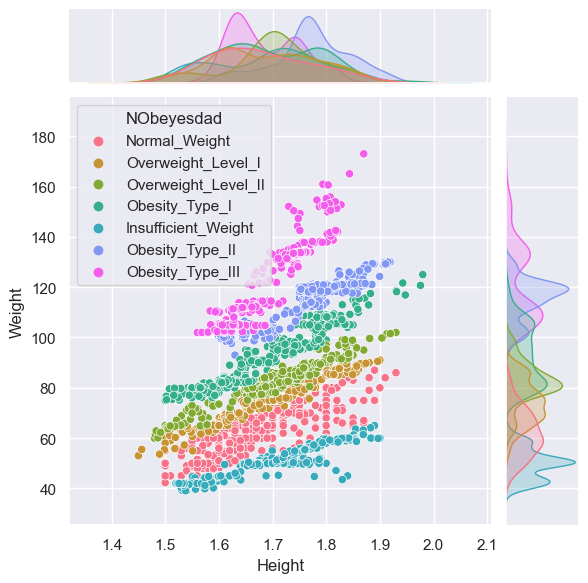

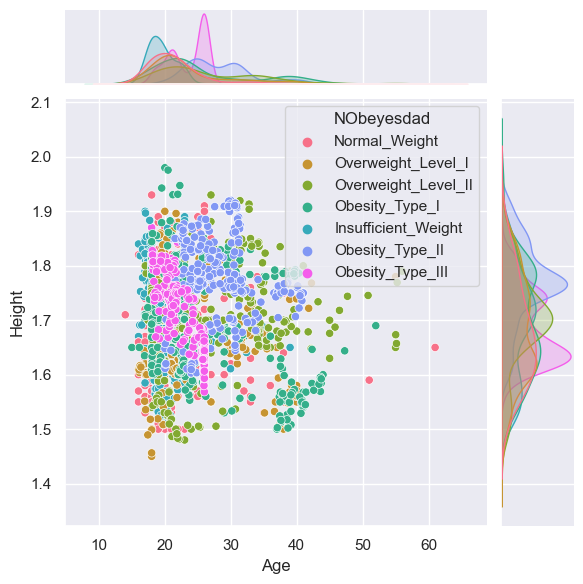

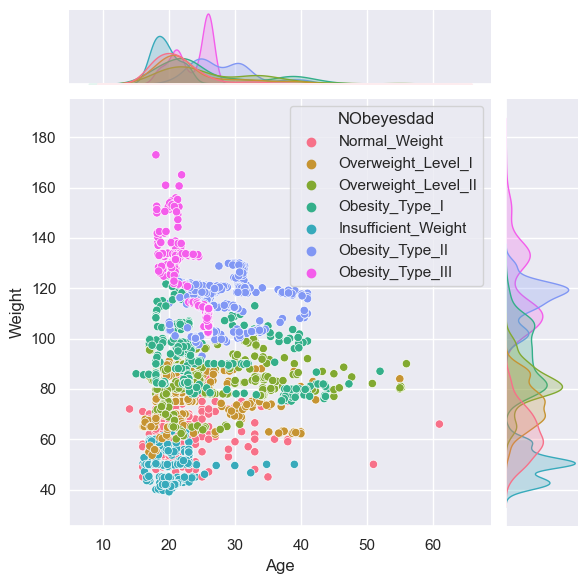

In [946]:
# Set the palette for species colors
obesity_palette = sns.color_palette("husl", len(data['NObeyesdad'].unique()))

# Create jointplot with species colors and set size
sns.jointplot(x='Height', y='Weight', data=data, kind="scatter", hue='NObeyesdad', palette=obesity_palette, height=6)
plt.show()

# Create jointplot with species colors and set size
sns.jointplot(x='Age', y='Height', data=data, kind="scatter", hue='NObeyesdad', palette=obesity_palette, height=6)
plt.show()

# Create jointplot with species colors and set size
sns.jointplot(x='Age', y='Weight', data=data, kind="scatter", hue='NObeyesdad', palette=obesity_palette, height=6)
plt.show()


Let's visualise it more using a histogram for better view for outliers as histograms can provide insights into the distribution of numerical data. Unusual spikes or tails in the histogram may indicate the presence of outliers. 

By visualising histogram and analysing the data we only need to remove some outliers from age as we can see some unsual spikes in the histogram of Age.

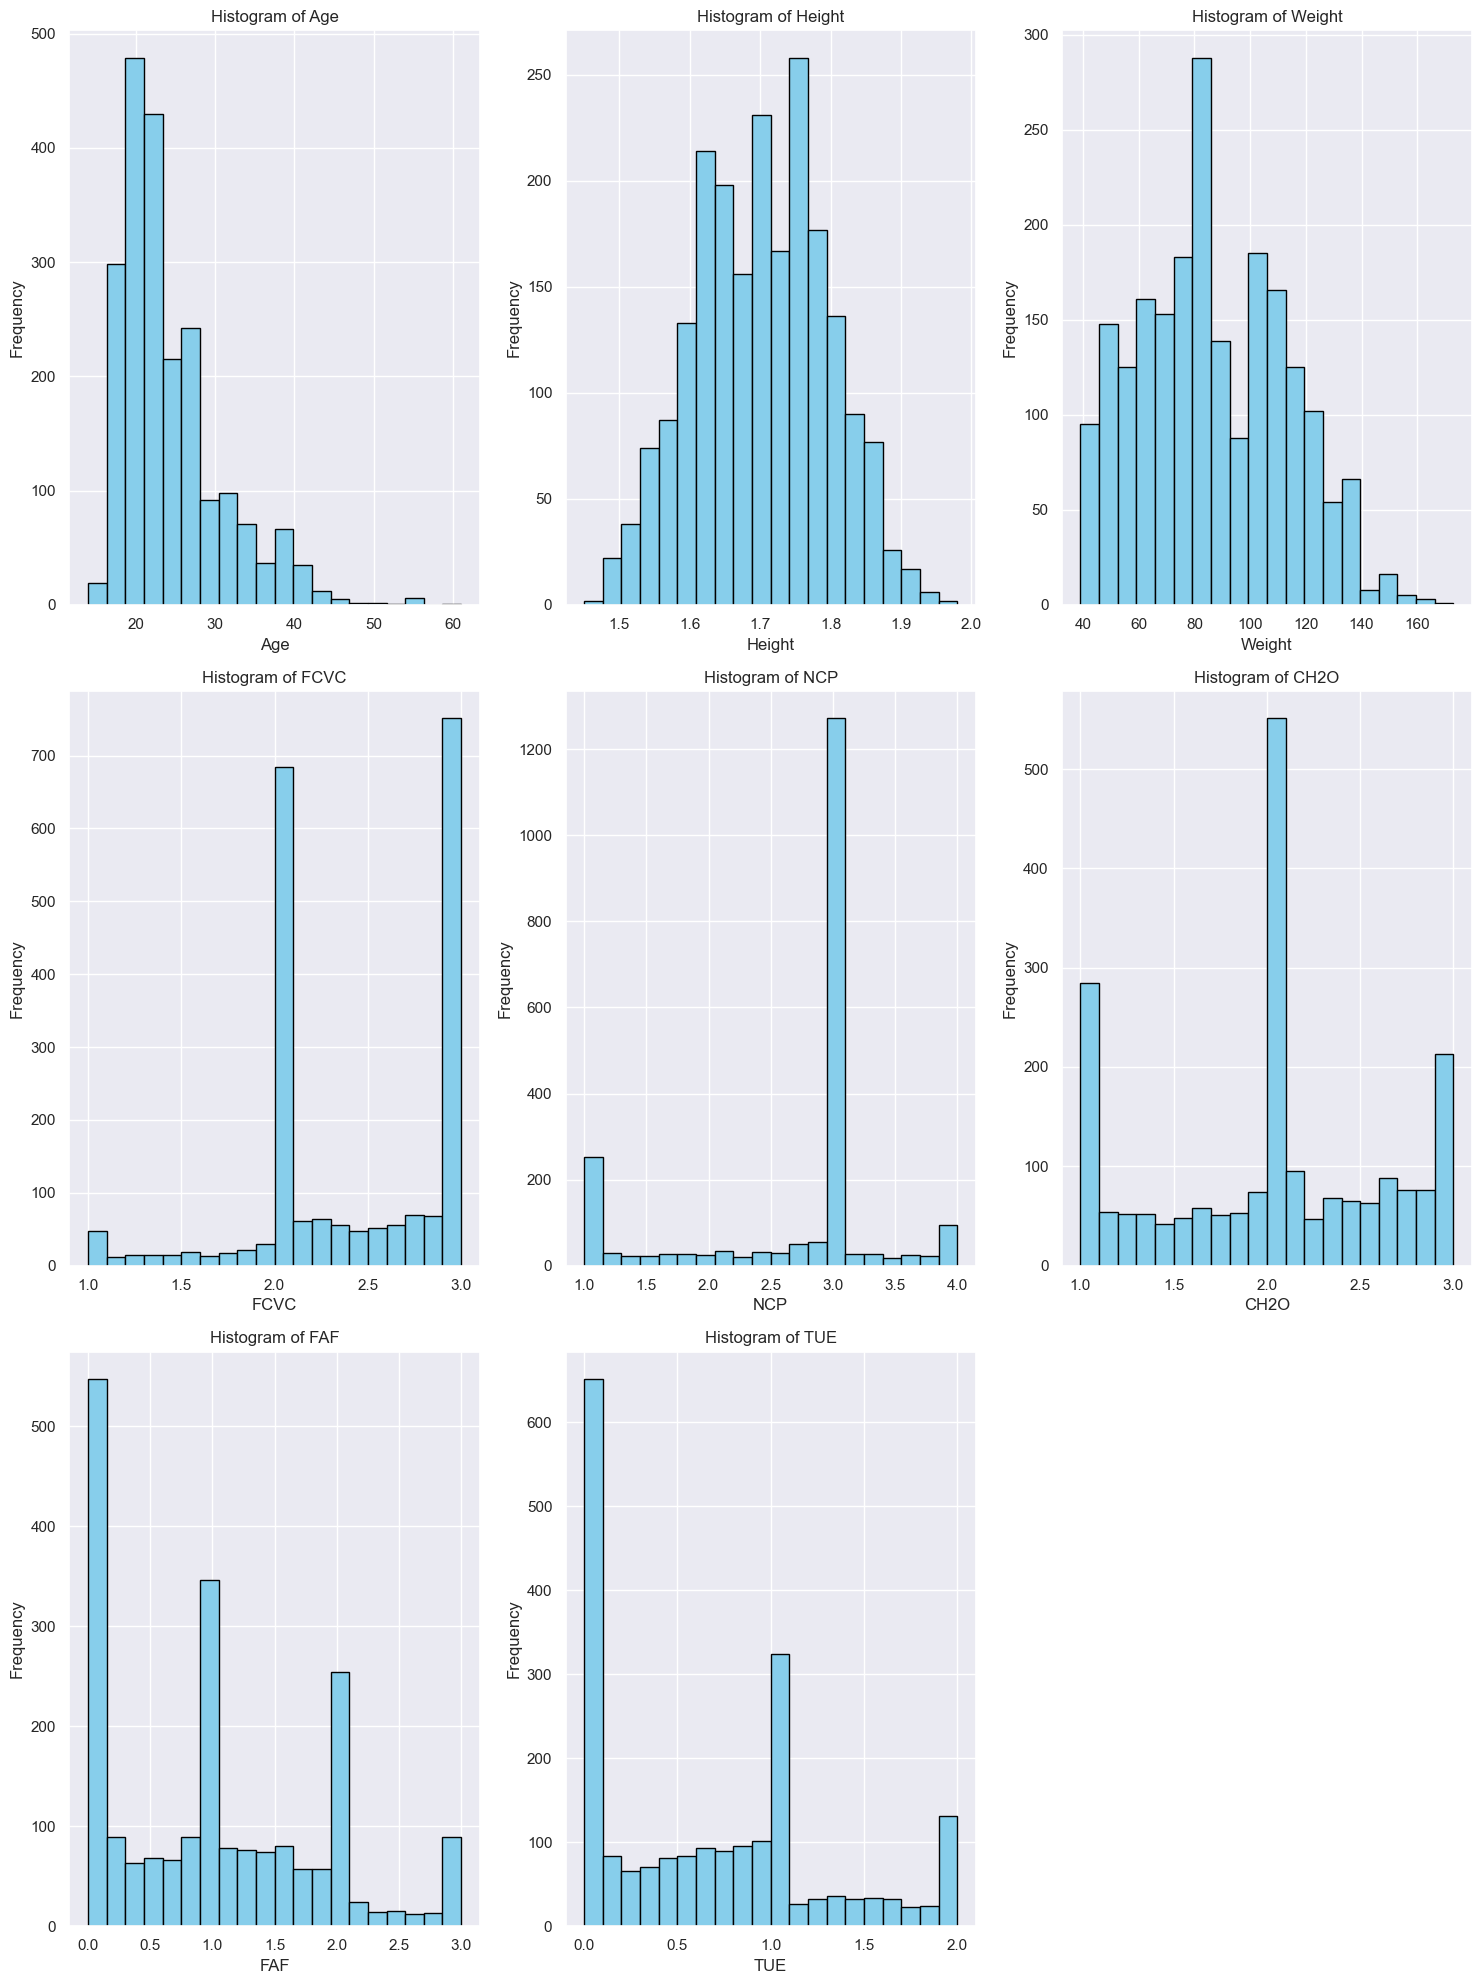

In [947]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float'])

# Plot histograms for all numerical columns
fig, axes = plt.subplots(nrows=len(numerical_columns.columns) // 3 + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, (column_name, column_data) in enumerate(numerical_columns.items()):
    ax = axes[i]
    ax.hist(column_data, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

This code defines a function **remove_outliers** that removes outliers from a specified column in a DataFrame. The remove_outliers function takes two parameters: data, which is the DataFrame from which outliers are to be removed, and column, which specifies the column in the DataFrame from which outliers are to be removed. The function calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the specified column using the quantile method. The interquartile range is calculated as the difference between Q3 and Q1. Lower and upper bounds for outlier detection are defined based on the quartiles and the IQR. 
The lower bound is calculated as Q1 - 1.5 * IQR, and the upper bound is calculated as Q3 + 1.5 * IQR Finally, the function filters the DataFrame data to retain only the rows where the values in the specified column fall within the calculated lower and upper bounds. The function returns the filtered DataFrame with outliers removed..

In [948]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the 'Age' column
data = remove_outliers(data, 'Age')

In this code we are visualysing histogram of age after removing outliers.

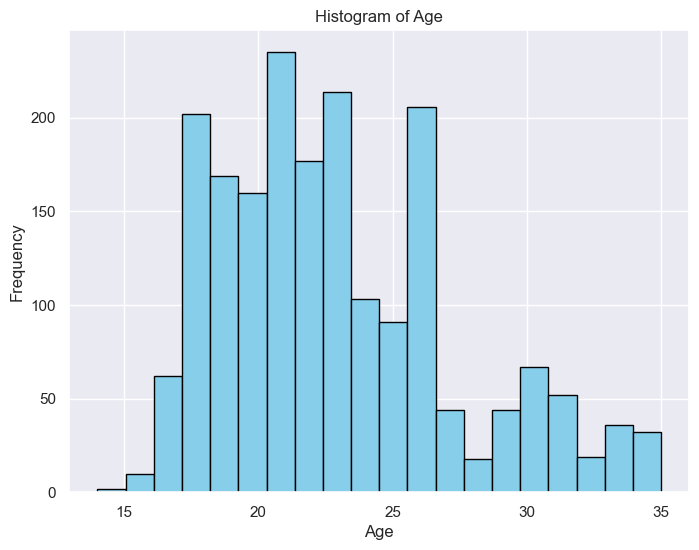

In [949]:
# Plot histogram of Age column
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This code generates countplots for each categorical column in the DataFrame data, with the count of each category displayed as bars, and each bar color-coded by the target variable NObeyesdad. The code iterates over each column name in categorical_columns using a for loop.For each categorical column, a new figure of size (8, 6) is created using plt.figure(figsize=(8, 6)). **sns.countplot(**) from the Seaborn library is used to generate the countplot 
The data parameter specifies the DataFrame from which the data will be plotte .
The x parameter specifies the categorical column to plot on the x-axis.
The hue parameter is set to 'NObeyesdad', indicating that the count of each category will be color-coded by the values of the target variable NObeyes ad.
This helps visualize the distribution of categories within each NObeyesdad group.

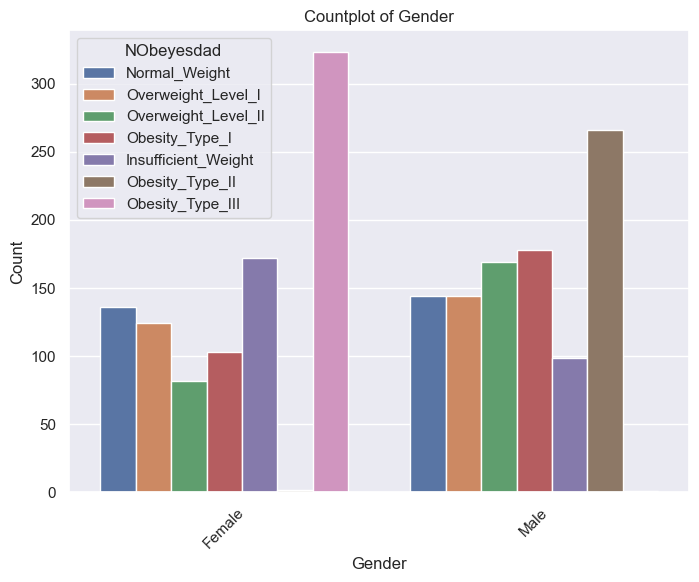

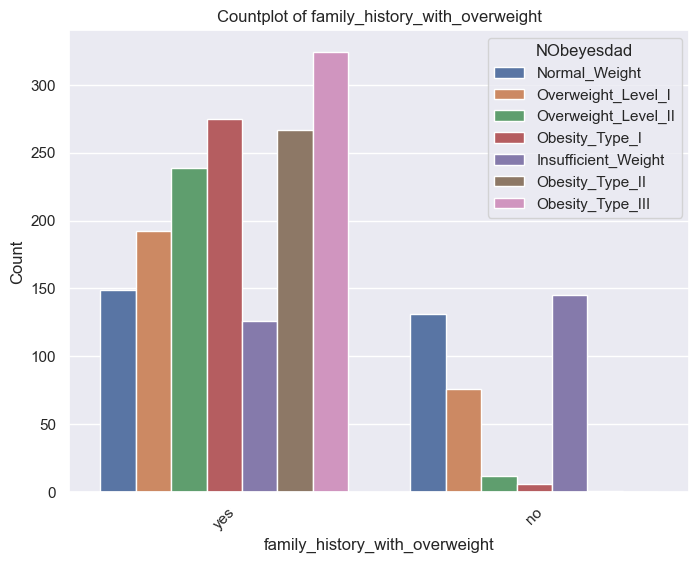

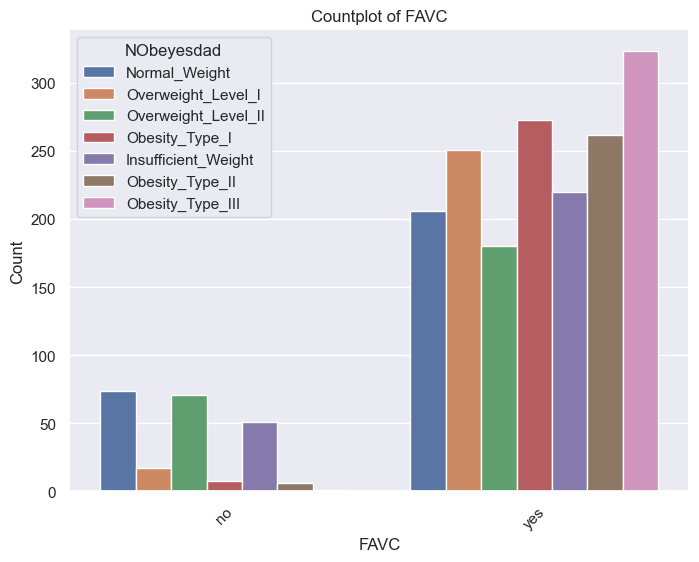

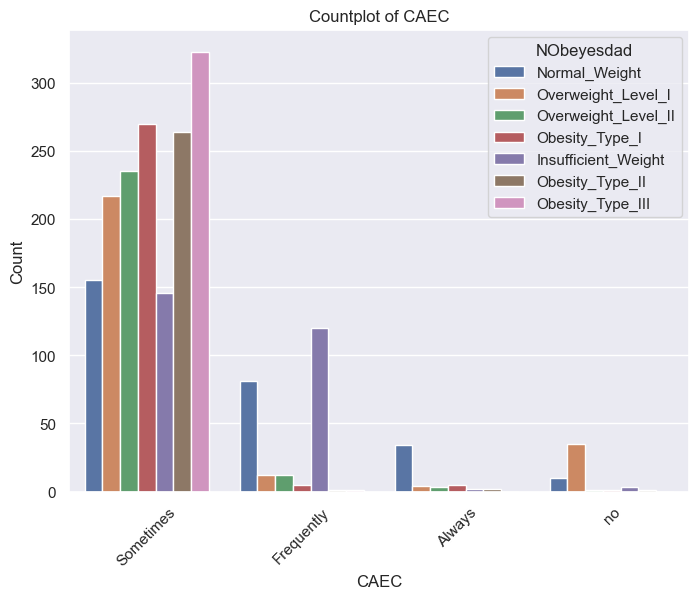

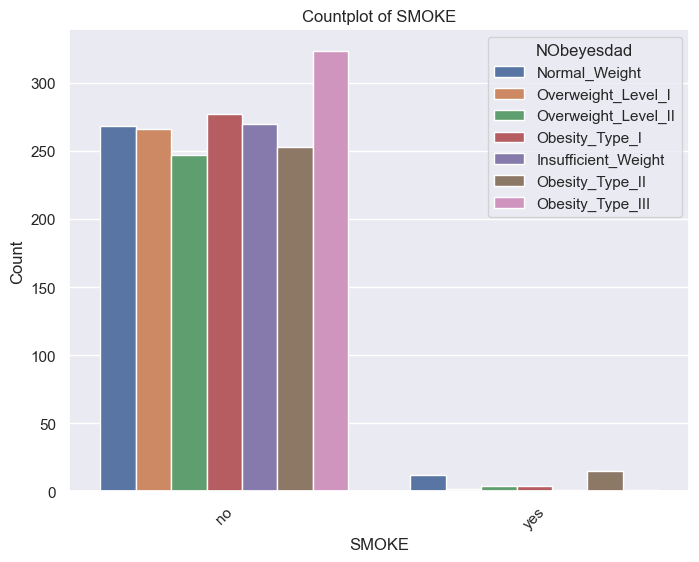

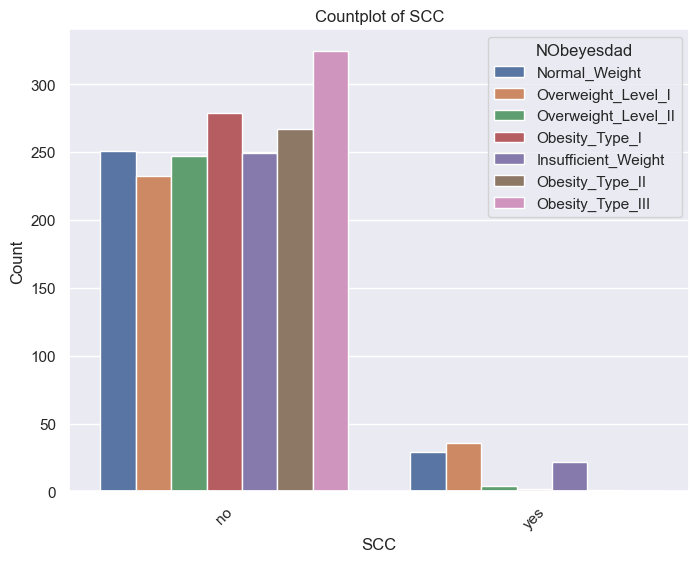

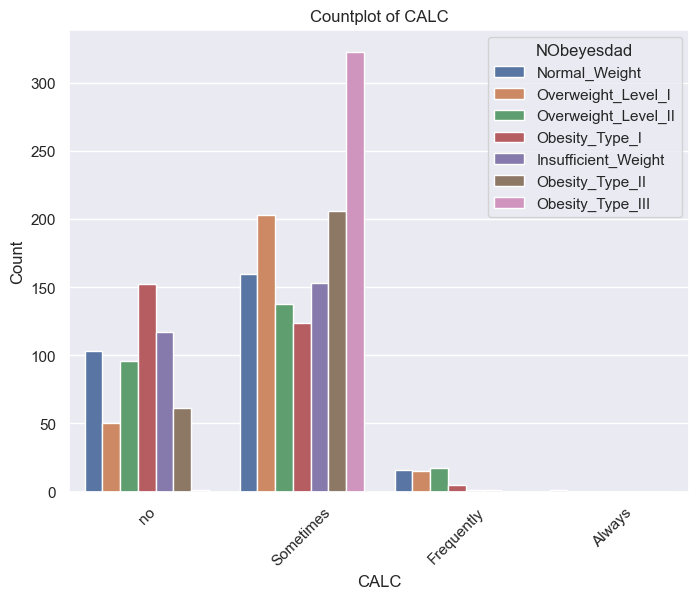

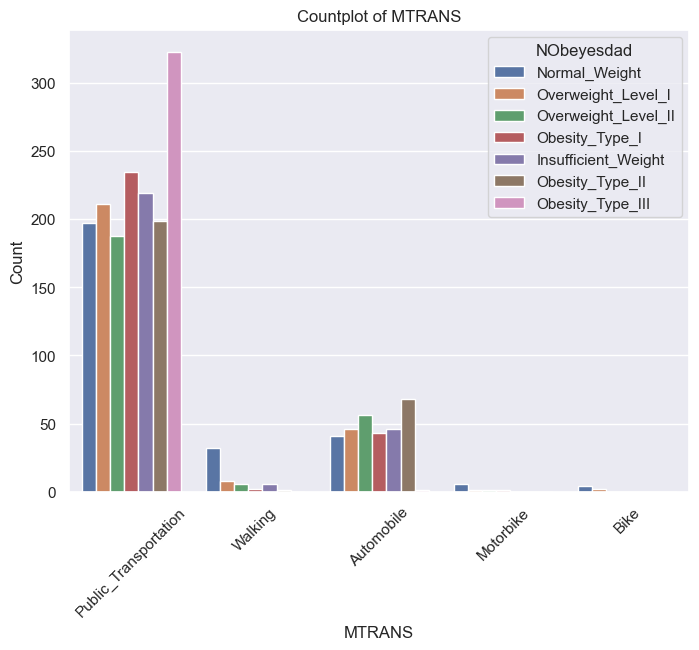

In [950]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column,hue='NObeyesdad')  # Specify order of bars
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

This bar chart displays the count of individuals falling into different weight categories based on their weight and obesity levels. The x-axis represents the weight categories, and the y-axis shows the count or frequency for each category. Insufficient weight has the highest count, represented by the tallest purple bar and the weight lies in between 38.86 to 61.33. Overweight_Level_I has the second-highest count, represented by an orange bar and the weight lies in the range of 61.33 to 83.66. Obesity_Type_II has the third-highest count, represented by a brown bar and the weight lies in the range of 106 to 128.33.

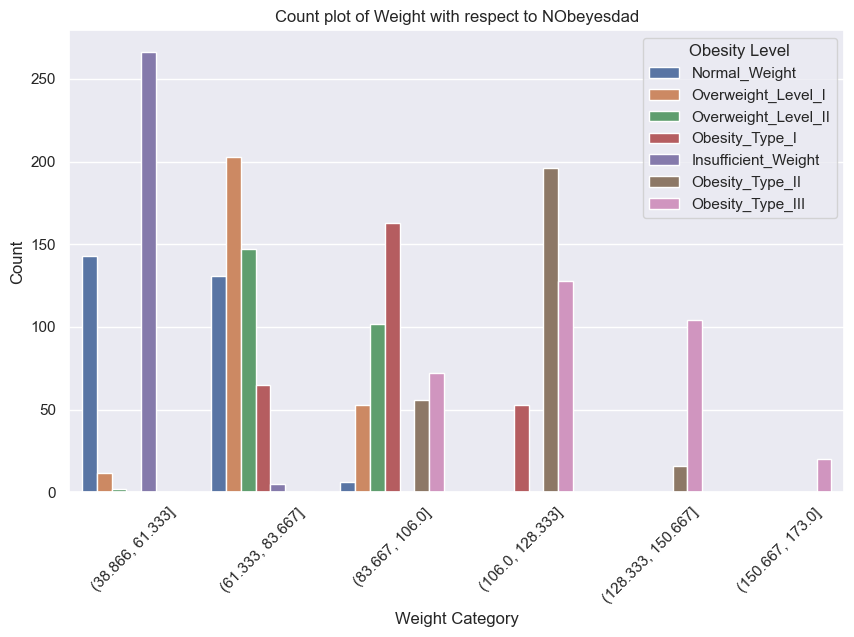

In [951]:
# Create a copy of the DataFrame
data_copy = data.copy()

# Discretize weight into bins or categories in the copied dataset
data_copy.loc[:, 'Weight_Category'] = pd.cut(data_copy['Weight'], bins=6)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create count plot for weight with respect to NObeyesdad
sns.countplot(x='Weight_Category', hue='NObeyesdad', data=data_copy)
plt.title('Count plot of Weight with respect to NObeyesdad')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Obesity Level')
plt.show()

This chart displays a count plot of age categories with respect to obesity levels. The x-axis represents different age categories, while the y-axis shows the count or frequency of individuals in each age group across various obesity levels.

The age categories are represented by ranges, such as1 (3.15,7.5),1 (7.5, 20.5), (20.5, 24.5), (24.5, 20.5), (20.5, 31.5), and (31.5,5.0.5

The age group with the highest count is (17.5, 21.0) having insufficient weight, represented by purple bar.).

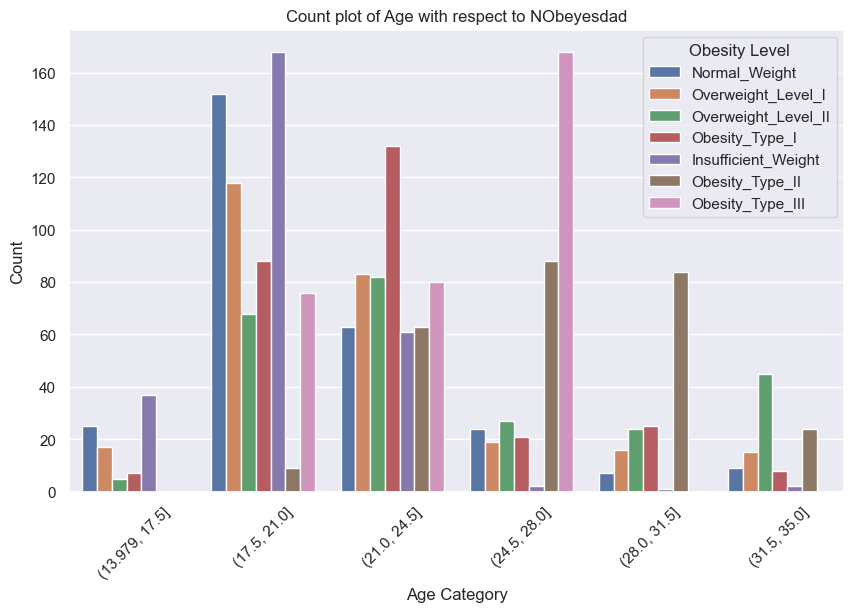

In [952]:
# Discretize age into bins or categories in the copied dataset
data_copy.loc[:, 'Age_Category'] = pd.cut(data_copy['Age'], bins=6)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create count plot for age with respect to NObeyesdad
sns.countplot(x='Age_Category', hue='NObeyesdad', data=data_copy)
plt.title('Count plot of Age with respect to NObeyesdad')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Obesity Level')
plt.show()

This chart displays a count plot of height categories with respect to obesity levels. The x-axis represents different height categories, while the y-axis shows the count or frequency of individuals in each Height group across various obesity levels.

The height categories are represented by ranges, such as (1.449,1.538), (1.538, 1.627), (1.627, 1.715), (1.715, 1.803), (1.803, 1.892), and (1.892, 1.98).

The height group with the highest count is (1.627, 1.715) having Obesity_Type_II, represented by pink bar.

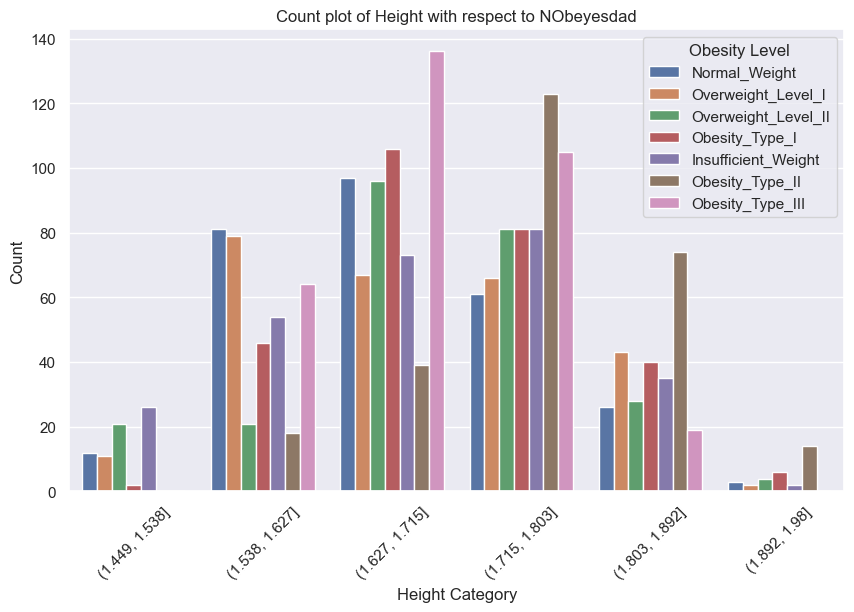

In [953]:
# Discretize height into bins or categories in the copied dataset
data_copy.loc[:, 'Height_Category'] = pd.cut(data_copy['Height'], bins=6)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create count plot for height with respect to NObeyesdad
sns.countplot(x='Height_Category', hue='NObeyesdad', data=data_copy)
plt.title('Count plot of Height with respect to NObeyesdad')
plt.xlabel('Height Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Obesity Level')
plt.show()

### 3. Organise the data for modelling

This code retrieves the unique values present in the target column of the DataFrame data,'NObeyesdad'. The output of this code will be a list of unique values present in the 'NObeyesdad' column.

In [954]:
unique_values = data['NObeyesdad'].unique()
print("Unique values in the target column:")
print(unique_values)

Unique values in the target column:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

And we have Different Overweight Levels in our dataset, let's replace 'Overweight_Level_I' and 'Overweight_Level_II' with Overweight for better consistency in data. 

This code replaces Overweight_Level_I and Overweight_Level_II with Overweight and then print the uniques values of the updated 'NObeyesdad' columnthan 40

In [955]:
# Replace 'Overweight_Level_I' and 'Overweight_Level_II' with 'Overweight'
data.loc[data['NObeyesdad'] == 'Overweight_Level_I', 'NObeyesdad'] = 'Overweight'
data.loc[data['NObeyesdad'] == 'Overweight_Level_II', 'NObeyesdad'] = 'Overweight'

# Check the updated 'NObeyesdad' column
print(data['NObeyesdad'].unique())


['Normal_Weight' 'Overweight' 'Obesity_Type_I' 'Insufficient_Weight'
 'Obesity_Type_II' 'Obesity_Type_III']


This code comprises functions to compute Body Mass Index (BMI) and map it to corresponding obesity classes, along with a segment that applies these functions to a DataFrame. Initially, the **calculate_bmi** function computes the BMI from weight in kilograms and height in meters, while the **map_bmi_to_obesity_class** function assigns an obesity class to the calculated BMI. Following the function definitions, the code duplicates the DataFrame and calculates BMI values for each row using the defined functions. The resultant BMI values are appended as a new column in the copied DataFrame. Finally, the original DataFrame is updated with this modified version, incorporating the newly computed BMI values. This script efficiently augments the DataFrame with BMI data and classifies individuals based on their BMI into distinct obesity categories.

In [956]:
# Define function to calculate BMI
def calculate_bmi(weight_kg, height_m):
    return round(weight_kg / (height_m ** 2), 1)

# Define function to map BMI to NObeyesdad class
def map_bmi_to_obesity_class(bmi):
    if bmi < 18.5:
        return "Insufficient_Weight"
    elif 18.5 <= bmi < 25.0:
        return "Normal_Weight"
    elif 25.0 <= bmi < 30.0:
        return "Overweight"
    elif 30.0 <= bmi < 35.0:
        return "Obesity_Type_I"
    elif 35.0 <= bmi < 40.0:
        return "Obesity_Type_II"
    else:
        return "Obesity_Type_III"

# Create a copy of the DataFrame
data_copy = data.copy()

# Calculate BMI for each row in the copied dataset
data_copy['BMI'] = data_copy.apply(lambda row: calculate_bmi(row['Weight'], row['Height']), axis=1)

# Assign the modified DataFrame back to the original variable
data = data_copy

This code segment performs a series of operations on a DataFrame named data. Firstly, it maps the BMI values stored in the 'BMI' column to their corresponding obesity classes using the map_bmi_to_obesity_class function, and stores the predicted classes in a new column named 'Predicted_Class'. Subsequently, it compares the predicted obesity classes with the actual classes stored in the 'NObeyesdad' column. 

The result of this comparison is stored in a new column called 'Correct_Prediction', where a value of True indicates that the predicted class matches the actual class, and False otherwise. Finally, it prints out a subset of the DataFrame containing columns for BMI, actual obesity class ('NObeyesdad'), predicted obesity class ('Predicted_Class'), and whether the prediction was correct ('Correct_Prediction'). This segment effectively evaluates the accuracy of the predicted obesity classes against the actual ones and provides a comparison within the DataFrame for further analysis.

In [957]:
# Map BMI to NObeyesdad class
data['Predicted_Class'] = data['BMI'].apply(map_bmi_to_obesity_class)

# Check if the predicted class matches the actual class
data['Correct_Prediction'] = data['NObeyesdad'] == data['Predicted_Class']

# Display the dataframe with BMI and predicted classes
print(data[['BMI', 'NObeyesdad', 'Predicted_Class', 'Correct_Prediction']])

       BMI        NObeyesdad   Predicted_Class  Correct_Prediction
0     24.4     Normal_Weight     Normal_Weight                True
1     24.2     Normal_Weight     Normal_Weight                True
2     23.8     Normal_Weight     Normal_Weight                True
3     26.9        Overweight        Overweight                True
4     28.3        Overweight        Overweight                True
...    ...               ...               ...                 ...
2106  44.9  Obesity_Type_III  Obesity_Type_III                True
2107  43.7  Obesity_Type_III  Obesity_Type_III                True
2108  43.5  Obesity_Type_III  Obesity_Type_III                True
2109  44.1  Obesity_Type_III  Obesity_Type_III                True
2110  44.1  Obesity_Type_III  Obesity_Type_III                True

[1943 rows x 4 columns]


This code filters the DataFrame data to include only rows where the predicted obesity class does not match the actual class, based on the comparison stored in the 'Correct_Prediction' column. The filtered DataFrame, containing only rows with incorrect predictions, is assigned to a new variable named incorrect_predictions_df. Subsequently, it checks if there are any incorrect predictions by verifying if the incorrect_predictions_df DataFrame is empty. If there are incorrect predictions, it prints out the BMI values of the rows with incorrect predictions, indicating the instances where the model's predictions did not align with the actual classes. However, if all predictions are correct, it prints a message stating so. This segment allows for the identification and examination of cases where the model's predictions diverge from the actual classes, aiding in the assessment and potential refinement of the predictive model.

In [958]:
# Filter the dataframe to include only rows with incorrect predictions
incorrect_predictions_df = data[~data['Correct_Prediction']]

# Check if there are any incorrect predictions
if not incorrect_predictions_df.empty:
    # Print the BMI values of rows with incorrect predictions
    print("BMI values of rows with incorrect predictions:")
    print(incorrect_predictions_df['BMI'])
else:
    print("All predictions are correct.")

BMI values of rows with incorrect predictions:
498     36.8
505     39.5
524     18.6
532     18.5
549     19.1
        ... 
2042    36.9
2044    39.4
2068    39.7
2096    39.6
2097    39.7
Name: BMI, Length: 95, dtype: float64


This code updates the 'NObeyesdad' category for rows with incorrect predictions. It identifies incorrect predictions, replaces the 'NObeyesdad' values with the predicted classes from 'Predicted_Class'.

In [959]:
# Update "NObeyesdad" category for rows with incorrect predictions
incorrect_rows = data[data['Correct_Prediction'] == False]
data.loc[incorrect_rows.index, 'NObeyesdad'] = incorrect_rows['Predicted_Class']

This code gives us all the column names present in the dataset.

In [960]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Predicted_Class',
       'Correct_Prediction'],
      dtype='object')

Since we have corrected the value of 'NObeyesdad' wrt to the bmi. Now we can drop some unwanted columns like 'BMI', 'Predicted_Class', 'Correct_Prediction'.

In [961]:
# Define the list of columns to drop
columns_to_drop = ['BMI', 'Predicted_Class', 'Correct_Prediction']

# Drop the specified columns from the DataFrame
data = data.drop(columns=columns_to_drop, axis=1)
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

The code in the below cell performs label encoding on categorical columns in a DataFrame using the **LabelEncoder** class from the **sklearn.preprocessing** module. 

After executing this code, the categorical columns in the DataFrame will be replaced with numerical labels, making it suitable for use in machine learning algorithms that require numerical input data. The original categorical values are mapped to unique integer labels, allowing the model to interpret and learn from the data effectively.

In [962]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [963]:
unique_values = data['NObeyesdad'].unique()
print(unique_values)

[1 5 2 0 3 4]


I chose to utilize the data training/test split methodology with a test size of 20%. This approach ensures that a portion of the data is reserved for testing the model's performance, allowing for an unbiased evaluation of its generalization capabilities on unseen data. Additionally, setting a random state ensures reproducibility, as it fixes the randomness in data shuffling during splitting. While cross-validation offers robustness, a simple train/test split suffices for this scenario, balancing computational efficiency with reliable model assessment.




This code separates the features (independent variables) from the target variable (dependent variable) in a DataFrame.

In [964]:
# Separate features (X) and target variable (y)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

This code below calculates the correlation coefficients between each feature and the target variable NObeyesdad. The values of a correlation coefficient ranges between -1 to 1. A value of 1 indicates a perfect positive correlation, meaning that the variables move in perfect harmony with each other. A value of -1 indicates a perfect negative correlation, meaning that the variables move in perfect opposite directions. A value of 0 indicates no linear correlation between the variables.
- There seem to be a strong positive linear relationship between family_history_with_overweight, Weight and CAEC with the target variable NObeyesdad
- The correlation coefficients are close to 0, suggesting a weak or no linear relationship with the target variable.
- The one in between suggests moderate positive or negative linear relationship.

In [965]:
# Calculate correlation between features and target variable
correlation = data.corr()['NObeyesdad'].drop('NObeyesdad')

# Print correlation coefficients
print(correlation)

Gender                            0.030893
Age                               0.289296
Height                            0.056319
Weight                            0.464134
family_history_with_overweight    0.350546
FAVC                              0.085024
FCVC                              0.029051
NCP                              -0.093778
CAEC                              0.359193
SMOKE                            -0.020683
CH2O                              0.135661
SCC                              -0.068669
FAF                              -0.112054
TUE                              -0.094921
CALC                             -0.192068
MTRANS                           -0.011470
Name: NObeyesdad, dtype: float64


In this code we have visualsed correlation matrix for all the features using heatmap, where colors represent the magnitude of the correlation coefficient. Warmer colors (e.g., red) indicate stronger positive correlations, while cooler colors (e.g., blue) indicate stronger negative correlations.
-  Height and gender have strong positive correlation.
-  Weight and height have strong positive correlation.
-  family_history_with_overweight and weight have strong positive correlaton.
-  MTRANS have strong negative correlation with Age.

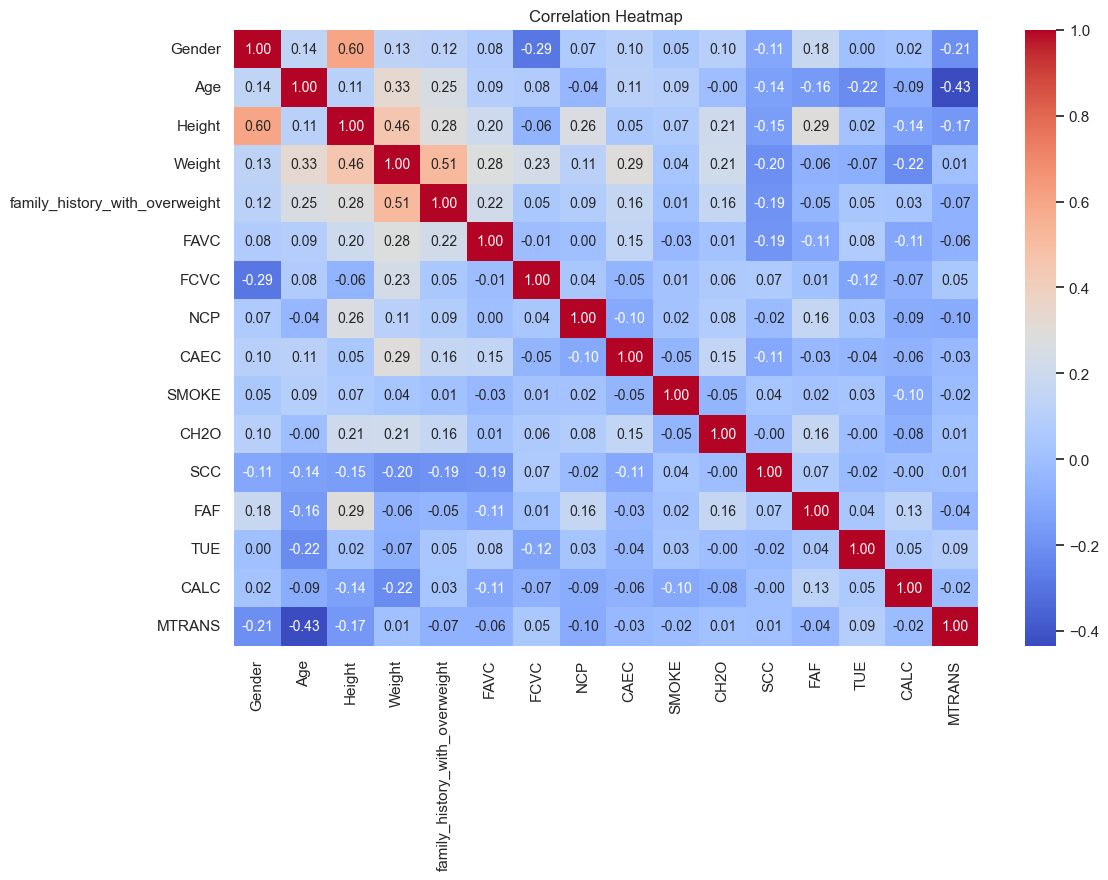

In [966]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

This code segment splits the data into training and testing sets for machine learning model training and evaluation. It utilizes the train_test_split function from the sklearn.model_selection module.

After executing this code, it creates four sets:

- X_train: Contains the features for training the model
- X_test: Contains the features for testing the trained mode
- y_train: Contains the corresponding target values for training
- y_test: Contains the corresponding target values for testinging.

In [967]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code standardizes the features in the dataset to have a mean of 0 and a standard deviation of 1. It utilizes the StandardScaler class from the sklearn.preprocessing module. 

Standardizing features is a common preprocessing step in machine learning to ensure that all features are on a similar scale. This can help improve the performance and convergence of certain machine learning algorithms, particularly those sensitive to the scale of the input features.

In [968]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Implement prediction models

**Logistic Regression**

First Model I'm using to train this data set is Logistic Regression because of the following reasons :
- Logistic regression provides easily interpretable results. It gives coefficients for each feature, indicating the strength and direction of their influence on the prediction. This could be valuable in understanding which factors contribute most significantly to obesity.
- Logistic regression tends to be computationally efficient, making it a good choice for datasets with a moderate number of features and samples.
- Classification Problem: Since the target variable ('NObeyesdad') appears to represent different levels of obesity, we can frame the problem as a  classification task.

Overall, logistic regression presents a balanced approach between simplicity, interpretability, and performance, making it a viable choice for training this dataset. the problem at hand.

The code below This code trains a logistic regression model using the LogisticRegression class from the scikit-learn library. It instantiates a logistic regression model object named log_reg. The max_iter parameter specifies the maximum number of iterations taken for the solver to converge. Here, it's set to 1000, meaning the solver will iterate up to 1000 times to optimize the model's parameters.

In [969]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

**Random Forest**

Second Model I'm using is Random Forest because of the following reasons :
- The relationships between features and the target variable ('NObeyesdad') are complex and non-linear, Random Forest can capture these non-linearities effectively.
- Random Forest is robust to outliers
- Random Forest provides a measure of feature importance, indicating which features are most influential in predicting the target variable. This can offer valuable insights into which factors contribute most significantly to obesity levels.
- Random Forest tends to generalize well to new data and is less prone to overfitting compared to individual decision trees, especially when trained with a large number of trees and properly tuned hyperparameters.
- Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. This ensemble approach tends to yield better generalization performance compared to individual decision trees, reducing overfitting and improving robustness.

This code instantiates a Random Forest model for classification using the RandomForestClassifier class from the scikit-learn library. The random_state parameter is set to 42 to ensure reproducibility. It controls the random number generator used by the algorithm, ensuring that the results are consistent across different runs.

In [970]:
# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)

### 5. Train prediction models


This code fits (trains) the logistic regression model log_reg to the training data When we call fit(X_train, y_train), the logistic regression model learns the optimal coefficients (weights) that minimize the logistic loss function, adjusting the parameters to best fit the relationship between the features (X_train) and the target variable (y_train).  

In [971]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

This line of code fits (trains) the Random Forest model random_forest to the training data. During training, the Random Forest algorithm builds multiple decision trees based on random subsets of the dataset (both samples and features). These decision trees are trained to predict the target variable (y_train).

In [972]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 6. Test prediction models and show results

In evaluating model performance, I prioritized metrics aligned with the problem context and goals. Accuracy, offering an overall measure of correct predictions, was useful for assessing the models' general performance when classes were balanced. Precision became pivotal as it measured the proportion of true positive predictions among all instances classified as positive, crucial in scenarios where false positives carry significant implications. Conversely, recall underscored the models' capability to identify true positive instances from the dataset, particularly important when avoiding false negatives is paramount. Additionally, the F1-score, being the harmonic mean of precision and recall, provided a balanced assessment of the models' precision-recall trade-off, especially valuable in the presence of class imbalance. By considering these metrics collectively, I gained a nuanced understanding of each model's capabilities and limitations, enabling informed decision-making in selecting the most suitable model for addressing the dataset's nuances and achieving the analysis objectives. This comprehensive approach ensured a thorough evaluation, guiding the selection of the model best suited to the task at hand.




**Logistic Regression**

This code segment below is making predictions on the test set using a logistic regression model (log_reg). 

In [973]:
# Predict on the test set
logistic_regression_predictions = log_reg.predict(X_test)

This code segment prints out a classification report for logistic_regression_predictions, which is a summary of the performance of a classification model on a set of test data. 
The classification report includes the following metrics for each class (and optionally, a weighted average of these metrics):
- Precision: The proportion of true positive predictions out of all positive predictions.
- Recall: The proportion of true positive predictions out of all actual positives.
- F1-score: The harmonic mean of precision and recall, providing a balance between the two.
- Support: The number of true instances for each class.lass.

In [974]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, logistic_regression_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        61
           1       0.93      0.72      0.81        53
           2       0.91      0.76      0.83        63
           3       0.88      0.90      0.89        78
           4       0.89      0.98      0.93        48
           5       0.85      0.94      0.90        86

    accuracy                           0.88       389
   macro avg       0.89      0.88      0.88       389
weighted avg       0.89      0.88      0.88       389



This code generates and visualizes a confusion matrix for evaluating the performance of the logistic regression model. The confusion_matrix function computes the confusion matrix using the true labels (y_test) and the predicted labels (logistic_regression_predictions). It provides a summary of the model's performance by comparing predicted classes against actual classes, helping to assess the model's performance and identify any patterns of misclassification.

The diagonal elements represent the correctly classified instances for each class. By summing these values (60 + 38 + 48 + 70 + 47 + 81 = 344) and dividing by the total number of instances, we can calculate the overall accuracy of the model. 

The model has a moderate number of misclassifications, as evident from the off-diagonal elements of the confusion matrix. 

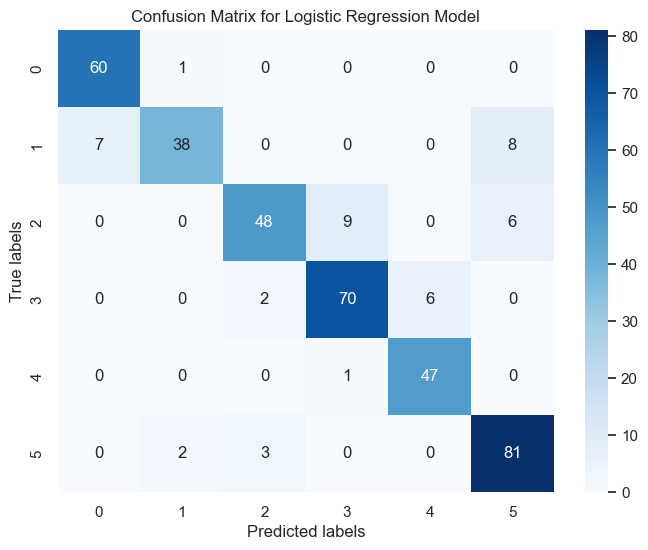

In [975]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

This code performs k-fold cross-validation on a logistic regression model (log_reg) using the training data (X_train and y_train). **cross_val_score** function performs k-fold cross-validation by splitting the training data into k folds, training the model on k-1 folds, and evaluating it on the remaining fold. In this case, it uses logistic regression (log_reg) as the estimator, X_train as the features, y_train as the target variable, and cv=k_folds to specify the cross-validation strategy. The scoring parameter is set to 'accuracy', meaning the accuracy of the model's predictions is used as the evaluation metric during cross-validation.

In [976]:
k_folds = KFold(n_splits = 5)

cv_scores = cross_val_score(log_reg, X_train, y_train, cv=k_folds, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-validation scores: [0.86173633 0.85209003 0.87138264 0.87459807 0.88064516]
Mean CV Score: 0.8680904470490614
Standard Deviation of CV Scores: 0.010071708419917686


**Random Forest**

The below line of code predicts the target variable (or class labels) for the test set using a trained Random Forest model (random_forest).The predictions are stored in the variable random_forest_predictions, which will contain the predicted class labels for each instance in the test set.

In [977]:
# Predict on the test set
random_forest_predictions = random_forest.predict(X_test)

This code prints the classification report for the random forest model's predictions on the test set.

In [978]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, random_forest_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       0.86      0.94      0.90        53
           2       0.95      0.92      0.94        63
           3       0.95      0.94      0.94        78
           4       0.96      0.98      0.97        48
           5       0.95      0.97      0.96        86

    accuracy                           0.95       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.95      0.95      0.95       389



This code calculates and visualizes the confusion matrix for the random forest model's predictions on the test set.

we can calculate the overall accuracy of the model, by summing these values (57 + 50 + 58 + 73 + 47 + 83 = 368) and dividing by the total number of instances. The accuracy seems to be quite high, indicating good overall performance and better in comparison to the Logistic Regression.

The model has relatively few misclassifications, as evident from the low values in the off-diagonal elements of the confusion matrix. This suggests that the model is effective in distinguishing between different classes. It is lower in comparison to Logistic Regression.

Overall, based on the confusion matrix, the Random Forest model appears to have excellent predictive performance, with high accuracy and good class-wise performance across most classes.

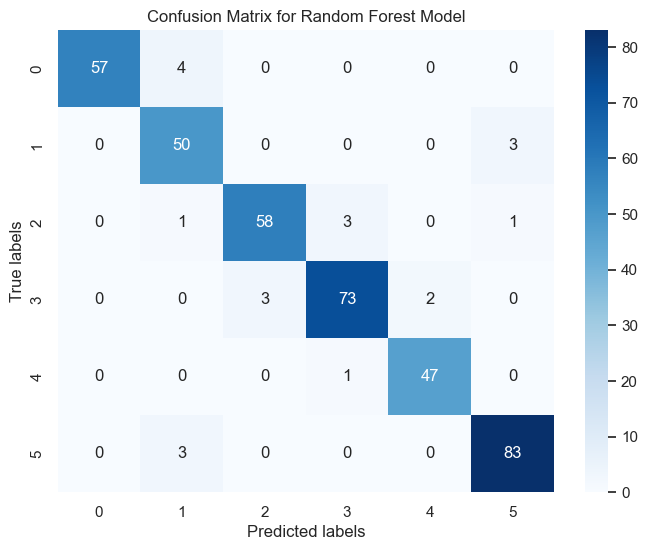

In [979]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, random_forest_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

This code below performs cross-validation for the random forest model. 

In [980]:
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=k_folds, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-validation scores: [0.92926045 0.91961415 0.92282958 0.94533762 0.9516129 ]
Mean CV Score: 0.9337309407737786
Standard Deviation of CV Scores: 0.01259038003848247


The code below calculates and displays the feature importances of the random forest model. The feature_importances_ attribute of the trained random forest model (random_forest) is used to obtain the importance scores of each feature. This attribute provides a relative measure of the importance of each feature in predicting the target variable. A DataFrame named df_feature_importance is created to store the feature names and their corresponding importances. The DataFrame has two columns: 'feature', which contains the feature names, and 'importance', which contains the feature importances calculated by the random forest model. This allows us to identify the features which are the most influential in making predictions with the random forest model. Age, Height, Weight, FCVC and CH2O have feature importance more than any other features. Smoke has the least feauture importance indicating least influence in making prediction.

In [981]:
feature_names = ['Gender', 'Age', 'Height',	'Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to display feature importances
df_feature_importance = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
print(df_feature_importance.sort_values(by='importance', ascending=True))

                           feature  importance
9                            SMOKE    0.002033
11                             SCC    0.004537
5                             FAVC    0.008080
15                          MTRANS    0.014930
4   family_history_with_overweight    0.025010
14                            CALC    0.025338
8                             CAEC    0.031181
0                           Gender    0.039179
7                              NCP    0.044887
12                             FAF    0.046212
13                             TUE    0.046454
10                            CH2O    0.052460
6                             FCVC    0.081007
1                              Age    0.091471
2                           Height    0.095629
3                           Weight    0.391594


### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Based on the evaluation metrics used above we have drawn following conclusions : 

- Random Forest has a **higher accuracy** compared to Logistic Regression, indicating that Random Forest makes more correct predictions overall.
- Random Forest has **high precision score** than Logistic Regression, indicating Random forest has better ability to make correct positive predictions in our case.
- Random Forest has **high recall score** than Logistic Regression, indicating Random forest has slightly better ability to capture true positive instances from the dataset, demonstrating its ability to minimize false negatives and thereby reduce the risk of missing important data points. This, coupled with its **higher F1-score**, which signifies a better balance between precision and recall, underscores Random Forest's overall efficacy in accurately classifying instances across different classes.
- Random Forest has a **higher mean of cross-validation scores** compared to Logistic Regression (0.90), suggesting that Random Forest may generalize better to unseen data.
- Random Forest has a **low standard deviation (SD) of cross-validation (CV) scores** indicates that the model's performance is consistent across different subsets of the training data, suggesting that the model is robust and less sensitive to variations in the training data.
- Random forest has very low **misclassifications** as we can see from the Confusion Matrix in comparison to Logistic Regression Model which has moderate. 

Collectively, these points affirm Random Forest is a better model for our dataset, offering superior performance across multiple evaluation metrics and demonstrating its effectiveness in handling the complexities inherent in our data.

### 8. Describe appropriate recommendations

After analyzing the data, here are the recommendations I'd like to make are:

- The bar chart for 'Average FAF by Obesity Level' shows that individuals with higher obesity levels tend to have lower physical activity frequency (FAF). Promoting regular exercise through community programs, access to recreational facilities, and educational campaigns can help increase physical activity levels.
  
- The countplot for 'SCC' (Calorie Consumption Monitoring) indicates that individuals with higher obesity levels are less likely to monitor their calorie intake. The countplot of FAVC also shows a higher frequency of high-caloric food consumption among all obesity types. Encouraging the practice of calorie monitoring through educational programs and the consumption of nutrient-dense, low-calorie foods and limiting high-calorie, processed foods can help manage weight and prevent obesity.
  
- The countplot for 'family_history_with_overweight' shows a higher prevalence of family history with overweight among individuals with higher obesity levels. While genetic factors cannot be controlled, providing personalized support and tailored intervention strategies for individuals with a family history of obesity could be helpful.
  
- The countplot of MTRANS suggests that individuals with obesity types I, II, and III rely more on sedentary modes of transportation. Promoting physical modes of transportation like walking and cycling can help burn excess calories and improve overall fitness.

- The countplot of CAEC shows a higher frequency of consumption of food between meals among individuals with obesity types I, II, and III. Encouraging mindful eating habits, such as eating slowly, paying attention to hunger cues, and avoiding emotional eating, can help regulate calorie intake. 

### 9. Reflect on what you have learned by completing this assignment

This machine learning project significantly enhanced my core competencies in data preprocessing and model development. I gained proficiency in techniques like handling missing values, encoding categorical variables, and feature scaling, ensuring data is optimally prepared for analysis. Furthermore, I honed my ability to implement and fine-tune popular algorithms like logistic regression and random forest, achieving optimal model performance through parameter adjustments.

The project emphasized the importance of cross-validation, providing valuable insights into model robustness and generalization capabilities. By leveraging data visualization libraries such as matplotlib and seaborn, I strengthened my ability to extract meaningful insights from the data and effectively communicate these findings to stakeholders.

Finally, the comprehensive evaluation of model performance using metrics like accuracy, precision, recall, and F1-score, coupled with the integration of cross-validation scores, equipped me with a robust skillset to critically assess and refine machine learning models.

### 10. References

- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
  
- https://www.w3schools.com/python/python_ml_cross_validation.asp
  
- https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

- https://machinelearningmastery.com/k-fold-cross-validation/

- https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

- https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
  
- https://www.geeksforgeeks.org/ml-matrix-plots-in-seaborn/

- https://stackoverflow.com/questions/39409866/correlation-heatmap